# Principal Components Analysis
This program was adapted from the following sources <br>
https://www.askpython.com/python/examples/principal-component-analysis<br>https://github.com/deepakjnv880/Principal-component-analysis/blob/master/main.py <br>

Contents: <br>
1. Program definition
2. Load MNIST Train Dataset
3. PCA application to test dataset, 64 principal components<br>
4. PCA application to test dataset, varying number of principal components


### 1. Program Definition

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset

import pandas
import matplotlib.pyplot as plt

import csv
import numpy as np

In [2]:
# dataset class - this will load data into dataframe, and has functions to check the image

class MnistDataset(Dataset):
    
    def __init__(self, csv_file):
        self.data_df = pandas.read_csv(csv_file, header=None)
        pass
    
    def __len__(self):
        return len(self.data_df)
    
    def __getitem__(self, index):
        # image target (label)
        label = self.data_df.iloc[index,0]
        target = torch.zeros((10))
        target[label] = 1.0
        
        # image data, normalised from 0-255 to 0-1
        image_values = torch.FloatTensor(self.data_df.iloc[index,1:].values) / 255.0
        
        # return label, image data tensor and target tensor
        return label, image_values, target
    
    def plot_image(self, index):
        img = self.data_df.iloc[index,1:].values.reshape(28,28)
        plt.title("label = " + str(self.data_df.iloc[index,0]))
        plt.imshow(img, interpolation='none', cmap='Blues')
        pass
    
    pass

In [3]:
def PCA(X , num_components):
     
    #Step-1
    X_meaned = X - np.mean(X , axis = 0)
    
    #print('x mean', X_meaned)
     
    #Step-2 covariance matirx - gives the covariance between each pair of elements of a given random vector
    # basically how much the data 'covaries' with each other along dimensions, around the centre
    cov_mat = np.cov(X_meaned , rowvar = False)
    
    #print('cov mat', cov_mat)
     
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
    # eigen vectors, v, are those that are along the same projection line following transformation
    # ie. Av = yv
    # eigen value is y, the scale of projection
     
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    # sorting the eigen values in terms of their size
    # largest eigen value corresponds to principal component with highest variability
    # then sort the eigen vectors into the same order as well
     
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
    # then take the first num_components of the eigen vectors ie. the number
    # of principal components we are concerned with
     
    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
    # input data shape is (dimension1, dimension2)
    # output data shape (dimension1, num_components)
    
     
    return X_reduced, eigenvector_subset, sorted_eigenvalue, X_meaned

In [4]:
def reconstruct(image_vector, eigen_vectors, score, mean_vector):
#      reconstruction(image,np.transpose(eig_vecs),score,mean_vector,i)
# recontruct, get from (dimension1, num_components) back to (dimension1, 784)
# dimension 1 number of pictures
    recon = np.dot((eigen_vectors), score)
    for i in range(len(recon)):
        recon[i] += mean_vector[i]
    
    return recon

### 2. Load MNIST Train Dataset

In [5]:
import pandas as pd

# training with mnist train

mnist_dataset = MnistDataset('mnist_dataset/mnist_train.csv')

#prepare the data, load into pandas.dataframe
x = mnist_dataset[:][1]
x_df = pd.DataFrame(x.numpy())

#prepare the label - ie. the label of the data point
label = mnist_dataset[:][0]

#Apply PCA function to data for dimensionality reduction
# PCA(data, number of desired principal components)
mat_reduced = PCA(x_df , 64)



### 3. PCA Application to test dataset, 64 principal components, saved to csv
This is the one that 'replicates' the other Neural Network outputs, whereby it trains on a training set and produces outputs from a separate test set.

In [11]:
# import data from MNIST test
test_dataset = MnistDataset('mnist_dataset/mnist_test.csv')

#prepare the data
y = test_dataset[:][1]
y_df = pd.DataFrame(y.numpy())

#prepare the correct label 
label = test_dataset[:][0]
 

In [28]:
# save reconstructed images into csv - 64 dimensions
import csv
import numpy

# the maths should still be from the original 'train' dataset
mat_reduced = PCA(x_df , 64)
eig_vecs = mat_reduced[1]
eig_values = mat_reduced[2]

with open('M1.3_pca_data.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    
    for i in range(0,100):
        image = y_df.iloc[i] # load one image at a time
        imarray = image.to_numpy() # convert to numpy array

        score = np.dot(eig_vecs.T, image) # some maths
        
        # important to note: first value is the number label
        # second value -10 means it is original,
        # -20 means it is reconstructed
        
        target = label[i] 
        z = (target, -10)
        row1 = numpy.append(z, imarray)
        writer.writerow(row1) 
        # save rows in the form (target, -10, [784 image pixel values])
        

        # mean vector of the original dataset values 
        mean_vector = np.mean(x_df, axis = 0)
        recon = reconstruct(image,eig_vecs,score,mean_vector)
        y = (target, -20)
        row2 = numpy.append(y, recon)
        writer.writerow(row2)

        pass

(200, 784)
Orignial


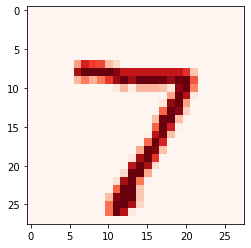

Reconstructed


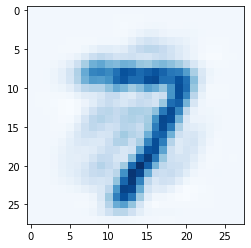

Orignial


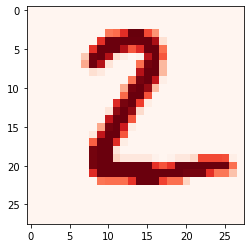

Reconstructed


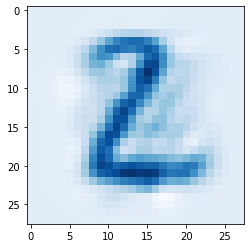

Orignial


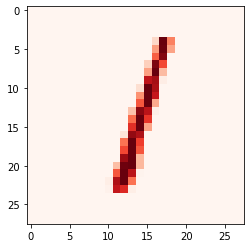

Reconstructed


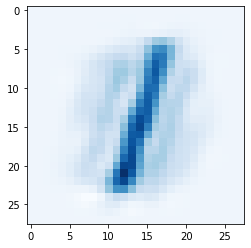

Orignial


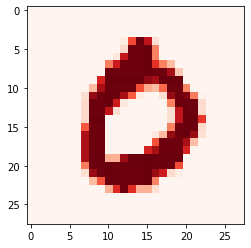

Reconstructed


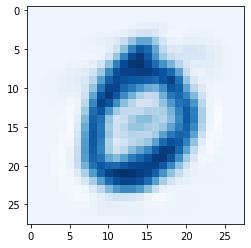

Orignial


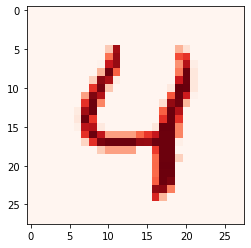

Reconstructed


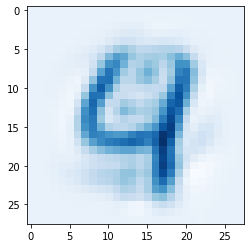

Orignial


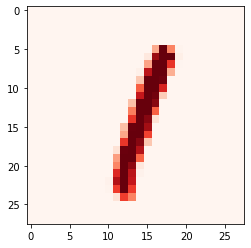

Reconstructed


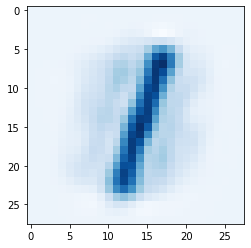

Orignial


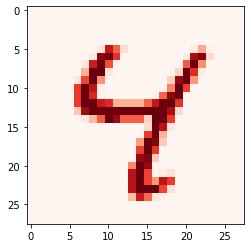

Reconstructed


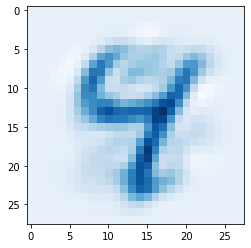

Orignial


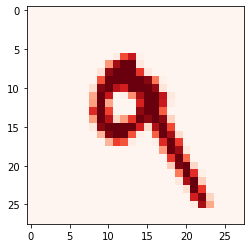

Reconstructed


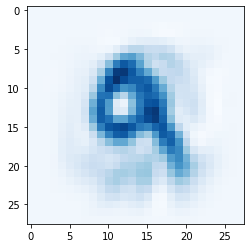

Orignial


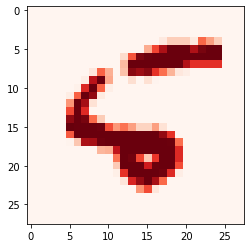

Reconstructed


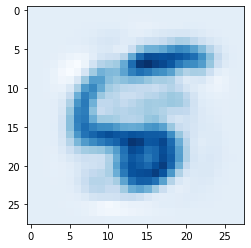

Orignial


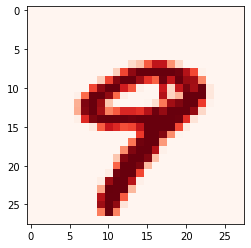

Reconstructed


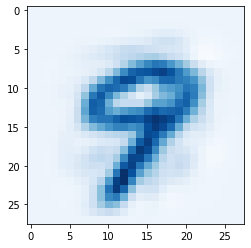

Orignial


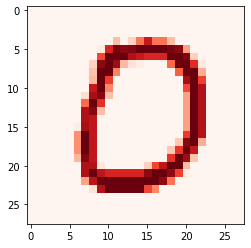

Reconstructed


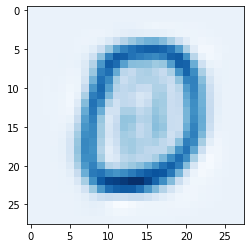

Orignial


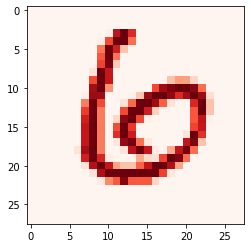

Reconstructed


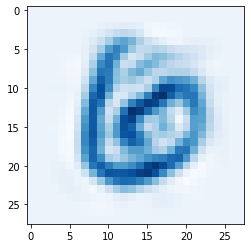

Orignial


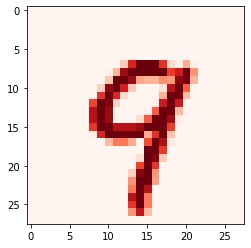

Reconstructed


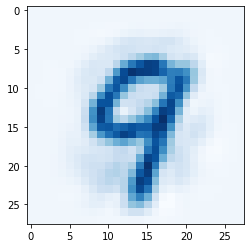

Orignial


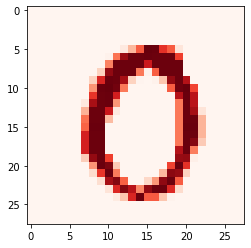

Reconstructed


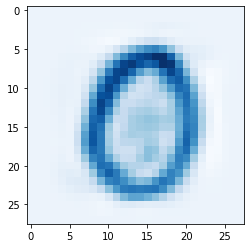

Orignial


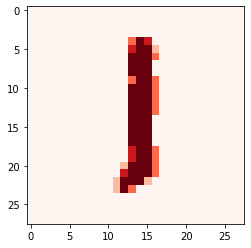

Reconstructed


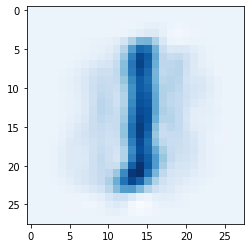

Orignial


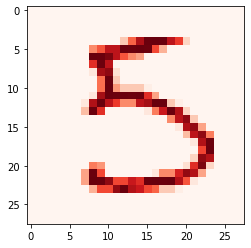

Reconstructed


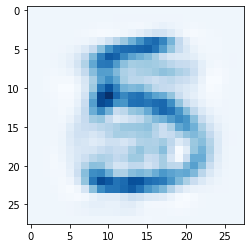

Orignial


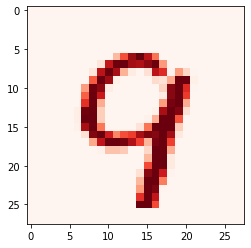

Reconstructed


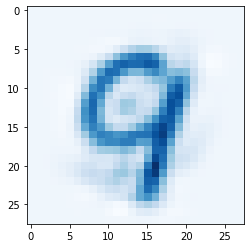

Orignial


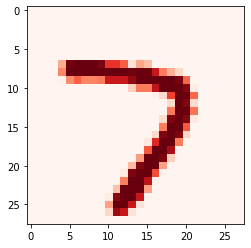

Reconstructed


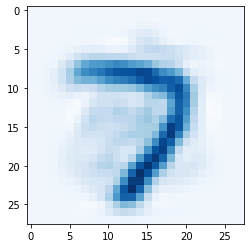

Orignial


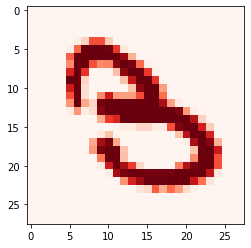

Reconstructed


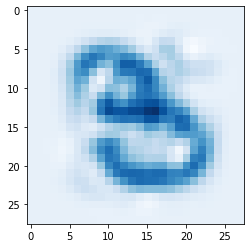

Orignial


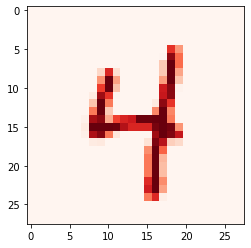

Reconstructed


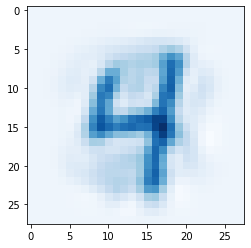

Orignial


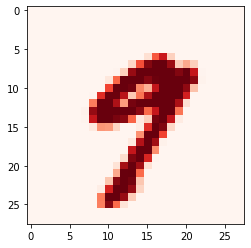

Reconstructed


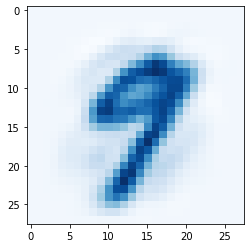

Orignial


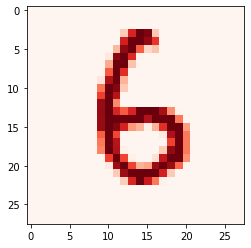

Reconstructed


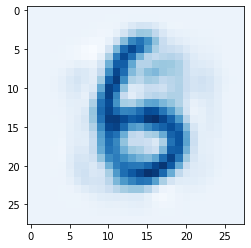

Orignial


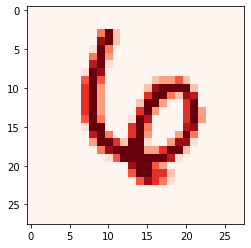

Reconstructed


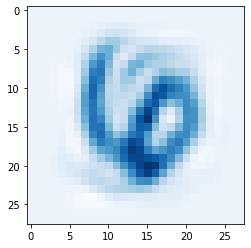

Orignial


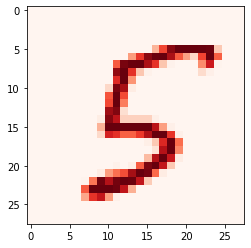

Reconstructed


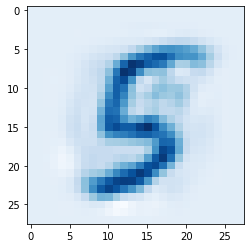

Orignial


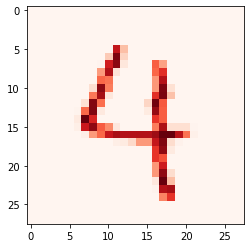

Reconstructed


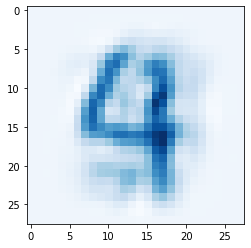

Orignial


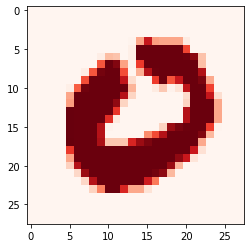

Reconstructed


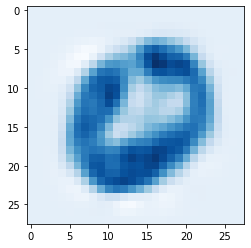

Orignial


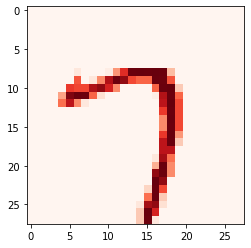

Reconstructed


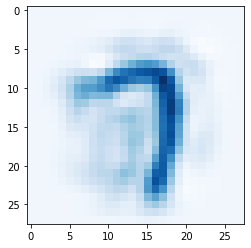

Orignial


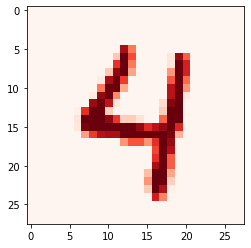

Reconstructed


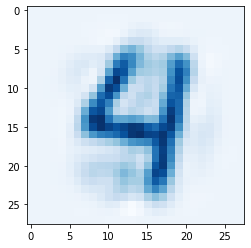

Orignial


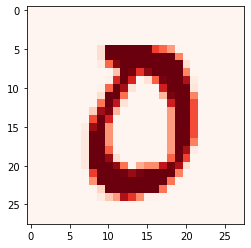

Reconstructed


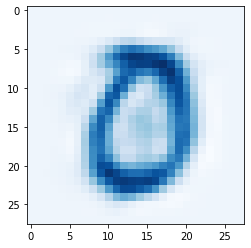

Orignial


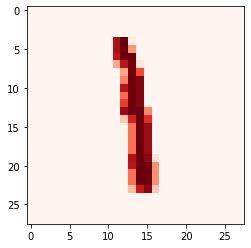

Reconstructed


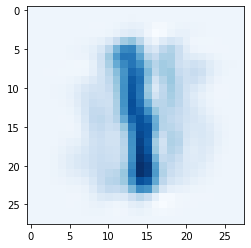

Orignial


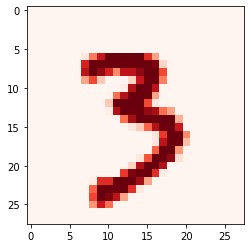

Reconstructed


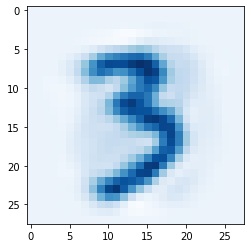

Orignial


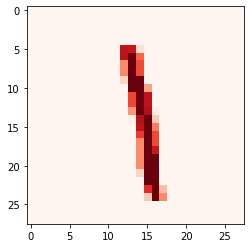

Reconstructed


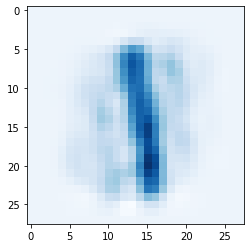

Orignial


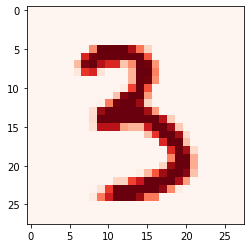

Reconstructed


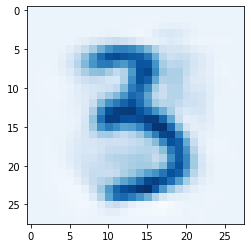

Orignial


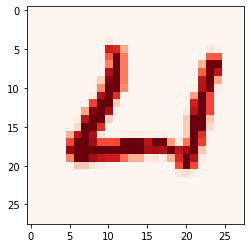

Reconstructed


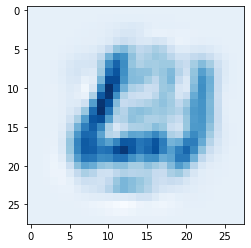

Orignial


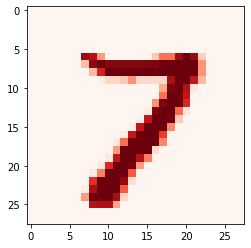

Reconstructed


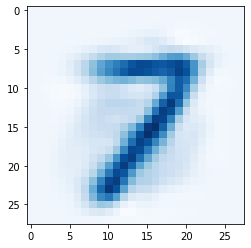

Orignial


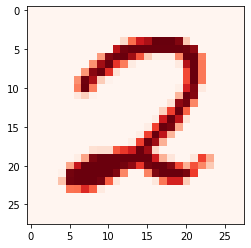

Reconstructed


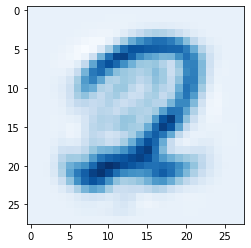

Orignial


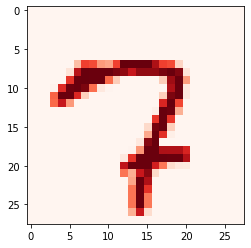

Reconstructed


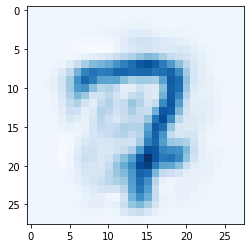

Orignial


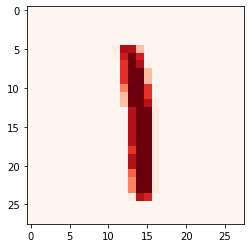

Reconstructed


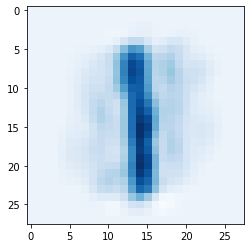

Orignial


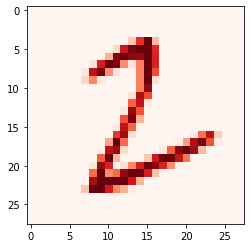

Reconstructed


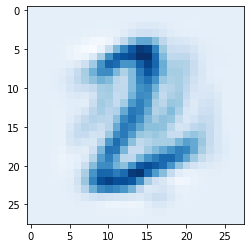

Orignial


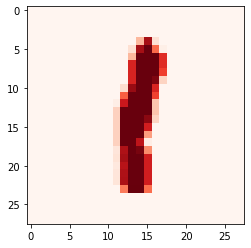

Reconstructed


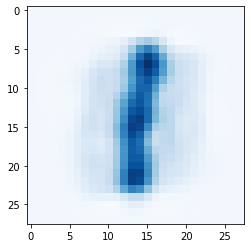

Orignial


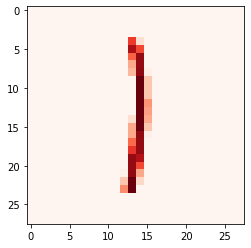

Reconstructed


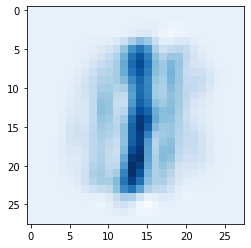

Orignial


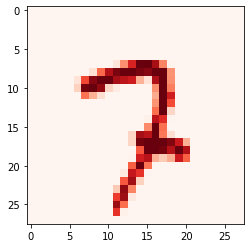

Reconstructed


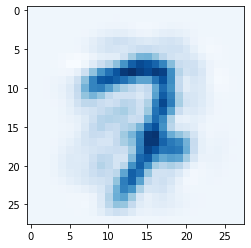

Orignial


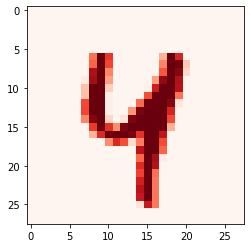

Reconstructed


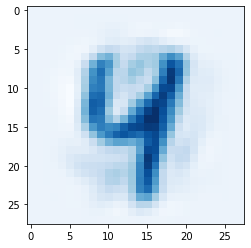

Orignial


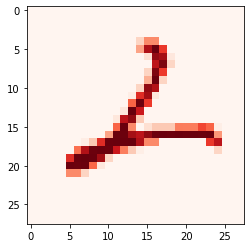

Reconstructed


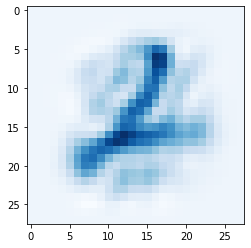

Orignial


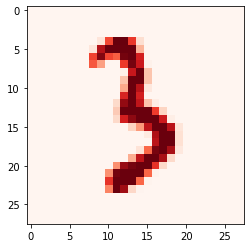

Reconstructed


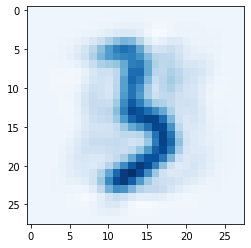

Orignial


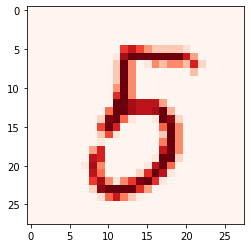

Reconstructed


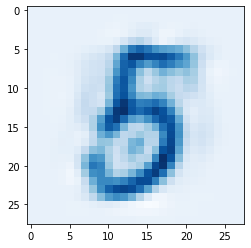

Orignial


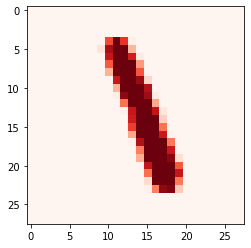

Reconstructed


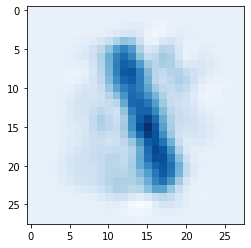

Orignial


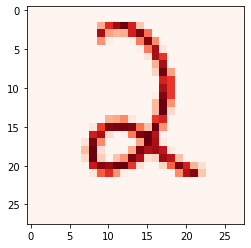

Reconstructed


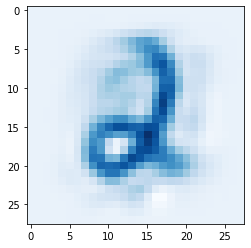

Orignial


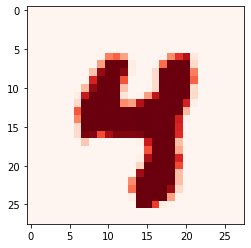

Reconstructed


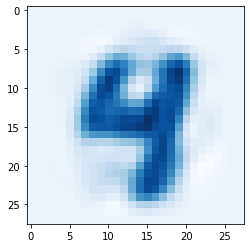

Orignial


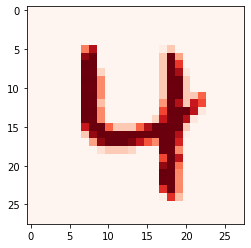

Reconstructed


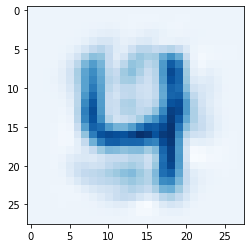

Orignial


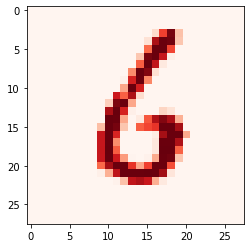

Reconstructed


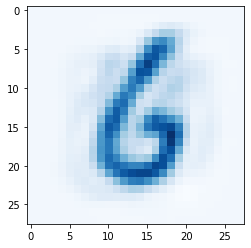

Orignial


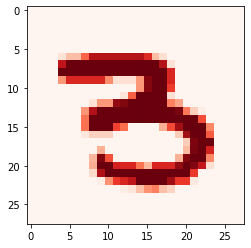

Reconstructed


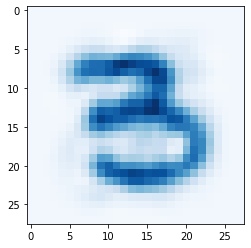

Orignial


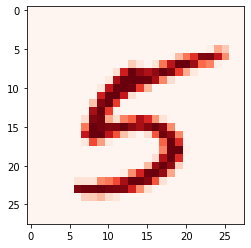

Reconstructed


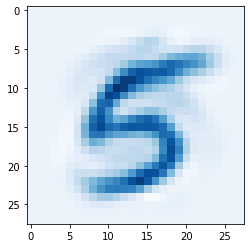

Orignial


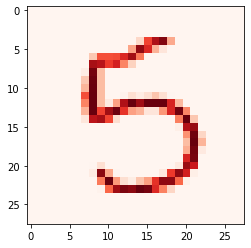

Reconstructed


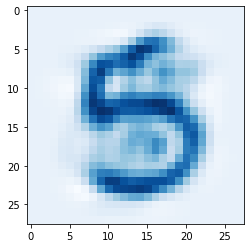

Orignial


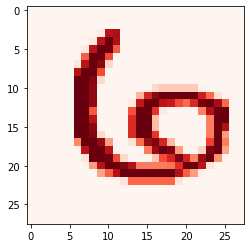

Reconstructed


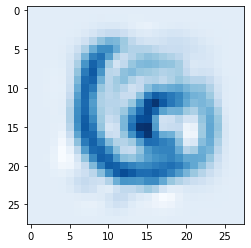

Orignial


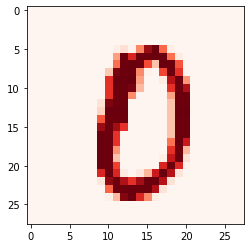

Reconstructed


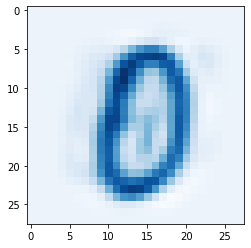

Orignial


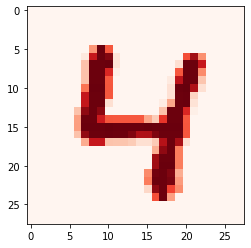

Reconstructed


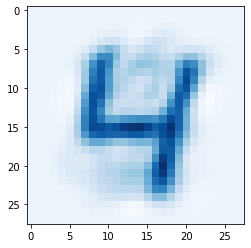

Orignial


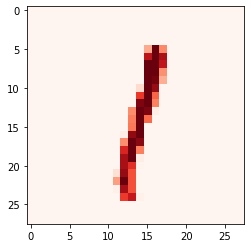

Reconstructed


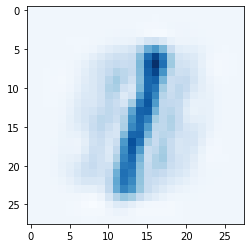

Orignial


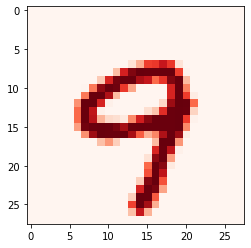

Reconstructed


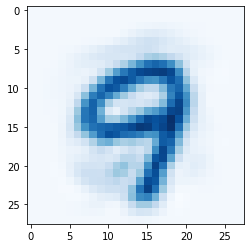

Orignial


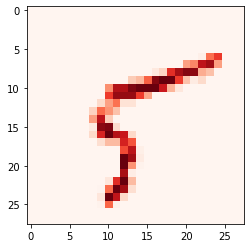

Reconstructed


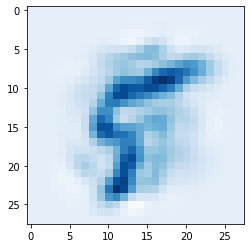

Orignial


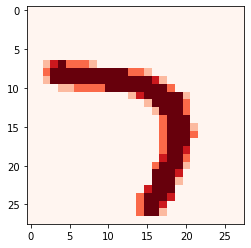

Reconstructed


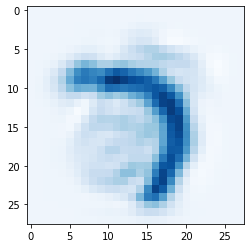

Orignial


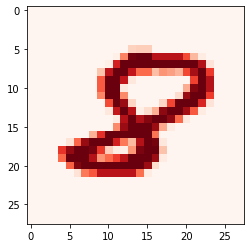

Reconstructed


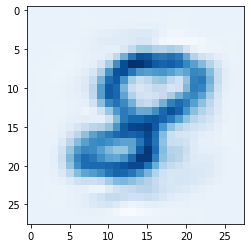

Orignial


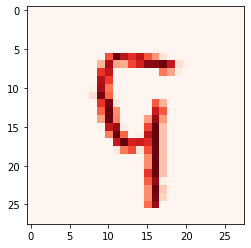

Reconstructed


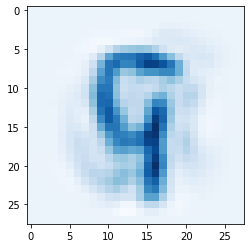

Orignial


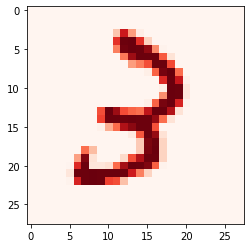

Reconstructed


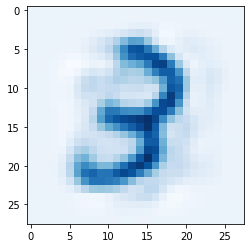

Orignial


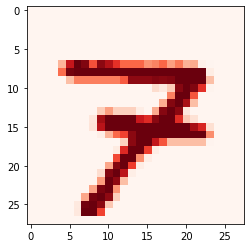

Reconstructed


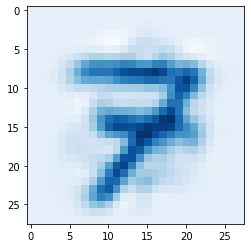

Orignial


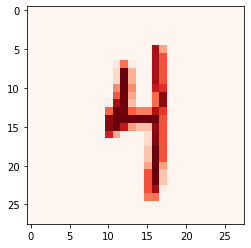

Reconstructed


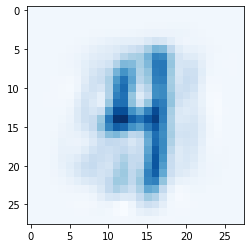

Orignial


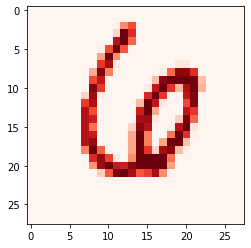

Reconstructed


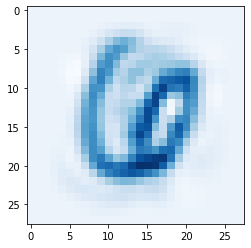

Orignial


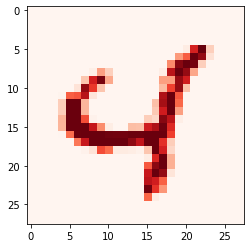

Reconstructed


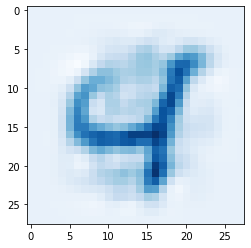

Orignial


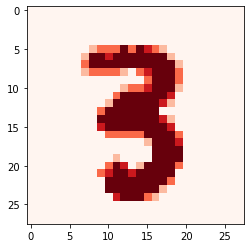

Reconstructed


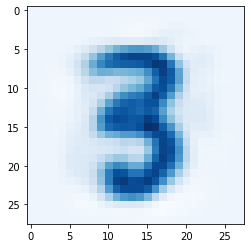

Orignial


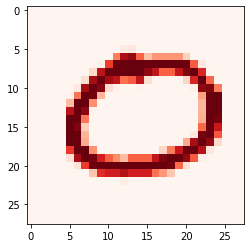

Reconstructed


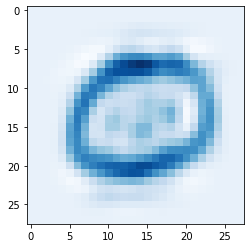

Orignial


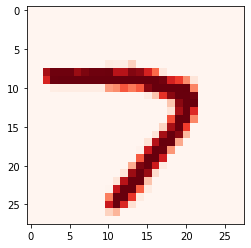

Reconstructed


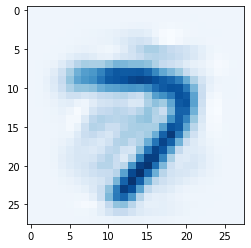

Orignial


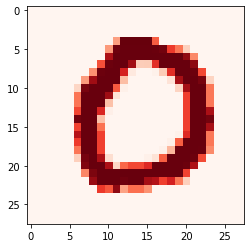

Reconstructed


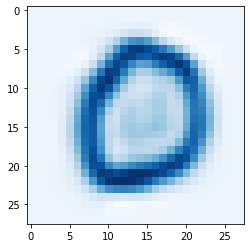

Orignial


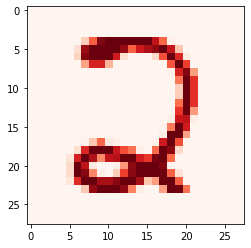

Reconstructed


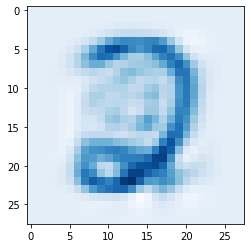

Orignial


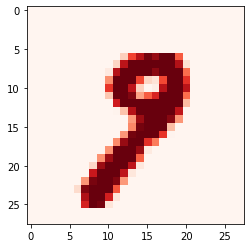

Reconstructed


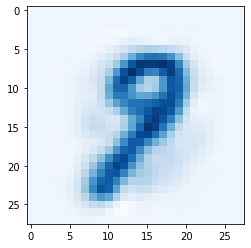

Orignial


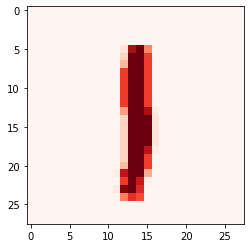

Reconstructed


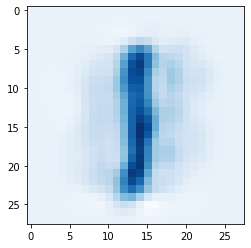

Orignial


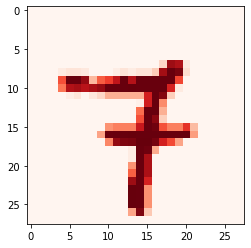

Reconstructed


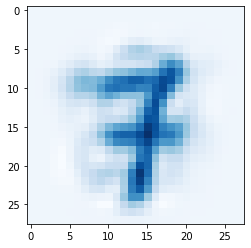

Orignial


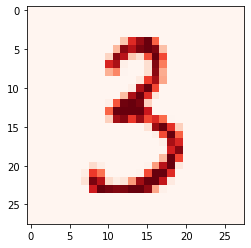

Reconstructed


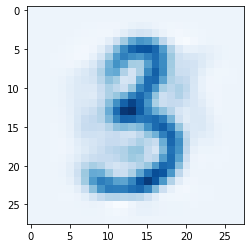

Orignial


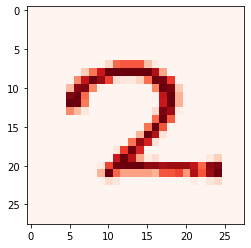

Reconstructed


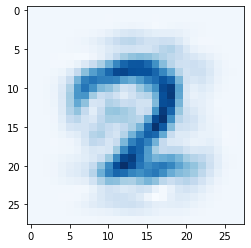

Orignial


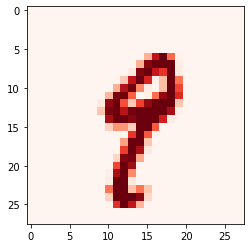

Reconstructed


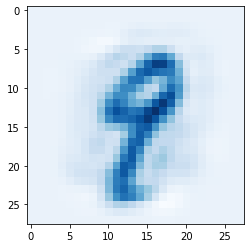

Orignial


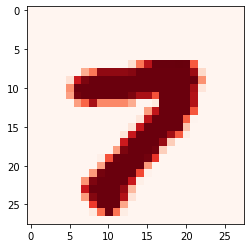

Reconstructed


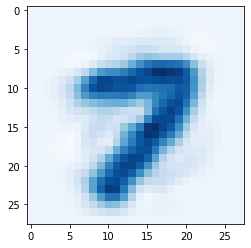

Orignial


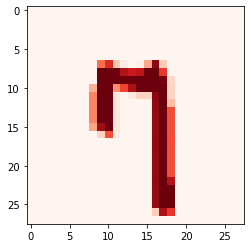

Reconstructed


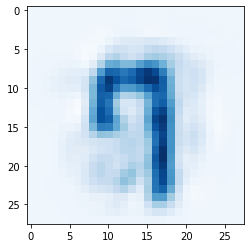

Orignial


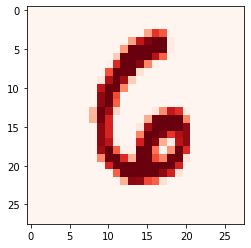

Reconstructed


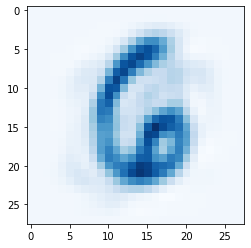

Orignial


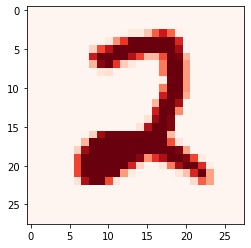

Reconstructed


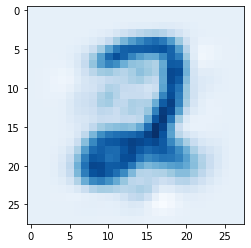

Orignial


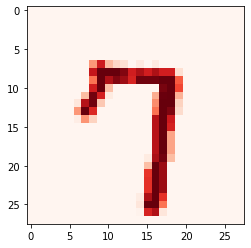

Reconstructed


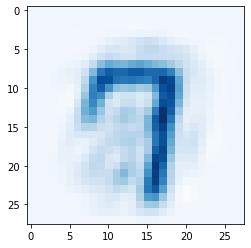

Orignial


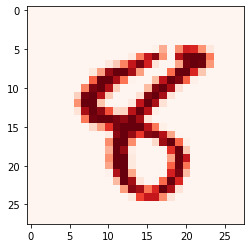

Reconstructed


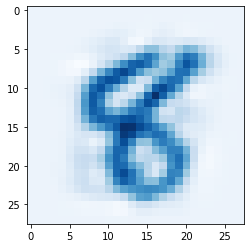

Orignial


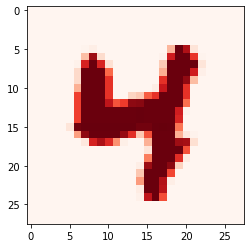

Reconstructed


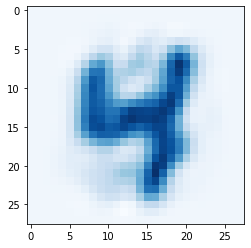

Orignial


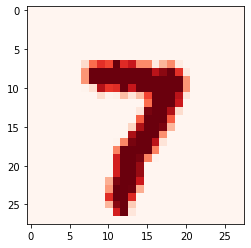

Reconstructed


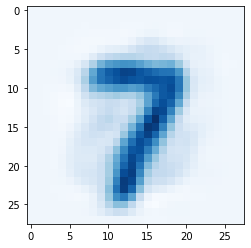

Orignial


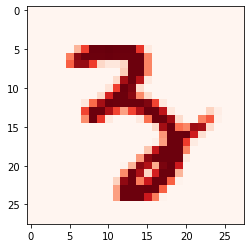

Reconstructed


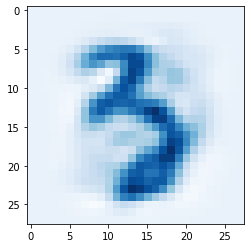

Orignial


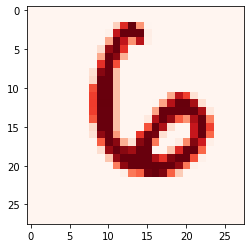

Reconstructed


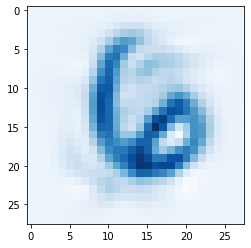

Orignial


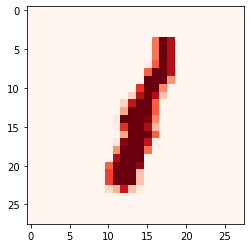

Reconstructed


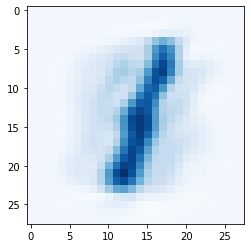

Orignial


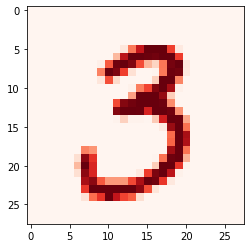

Reconstructed


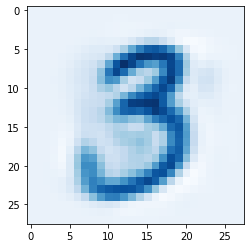

Orignial


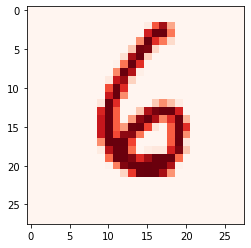

Reconstructed


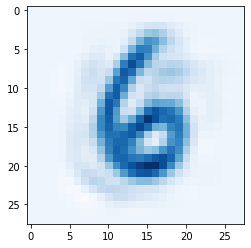

Orignial


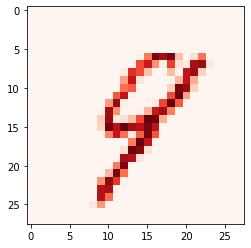

Reconstructed


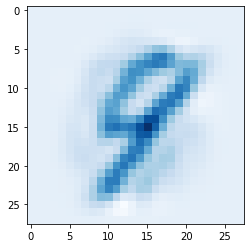

Orignial


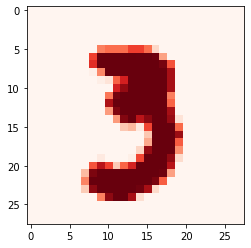

Reconstructed


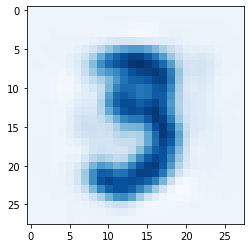

Orignial


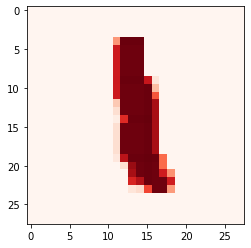

Reconstructed


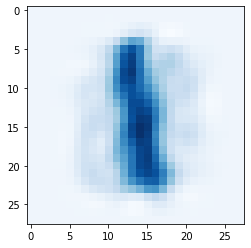

Orignial


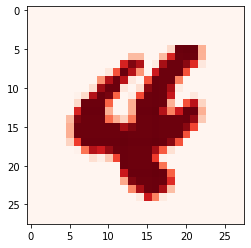

Reconstructed


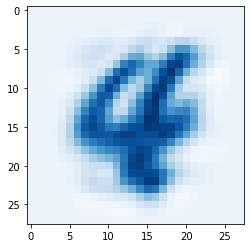

Orignial


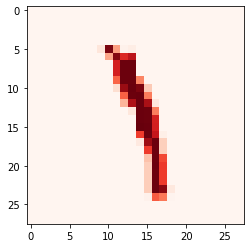

Reconstructed


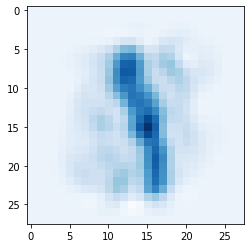

Orignial


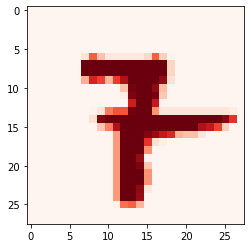

Reconstructed


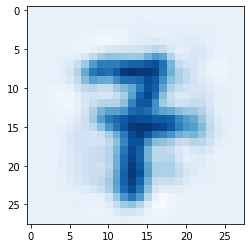

Orignial


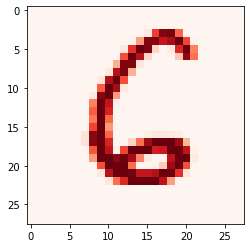

Reconstructed


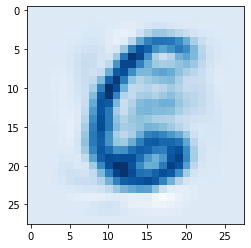

Orignial


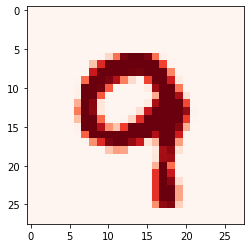

Reconstructed


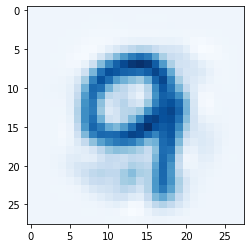

In [24]:
# print both original and reconstructed images
import numpy
labels = []
orig_or_recon = []
values = []
imgs = []
recons = []

# load data into array
with open('M1.3_pca_data.csv', newline='') as f:
    csv_data = csv.reader(f)
    for row in csv_data:
        labels.append(row[0])
        orig_or_recon.append(row[1])
        values.append(row[2:])
        
# convert data to usable floats
labels = numpy.asfarray(labels)
orig_or_recon = numpy.asfarray(orig_or_recon)
values = numpy.asfarray(values)
print(numpy.shape(values))

# print 
for i in range(0,len(labels)):
    if orig_or_recon[i] == -10:
        print('Orignial')
        imgs.append(values[i])
        image = values[i].reshape([28,28])  # reshape it into square
        plt.imshow(image, cmap='Reds') 
        plt.show()
    else:
        print('Reconstructed')
        recons.append(values[i])
        image = values[i].reshape([28,28])  # reshape it into square
        plt.imshow(image, cmap='Blues') 
        plt.show()

        
   

IndexError: list index out of range

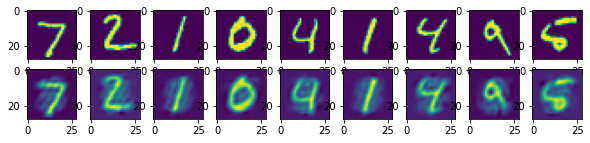

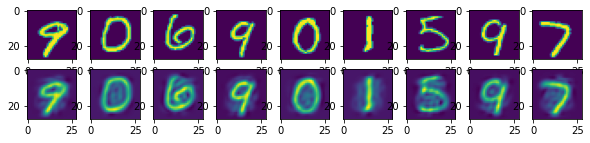

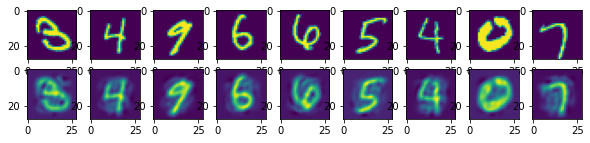

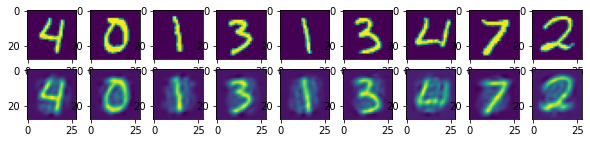

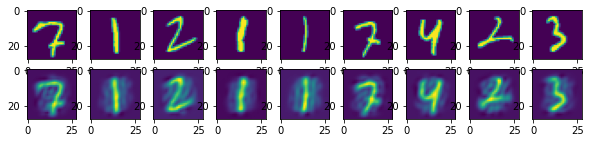

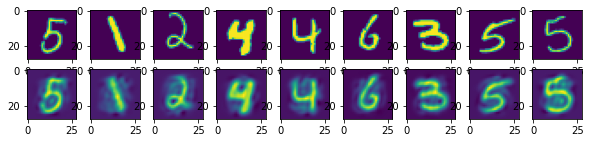

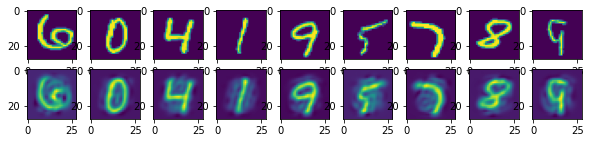

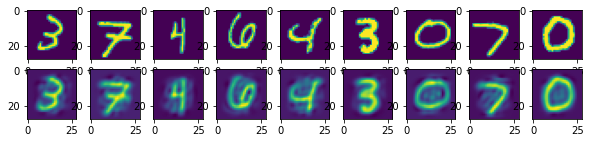

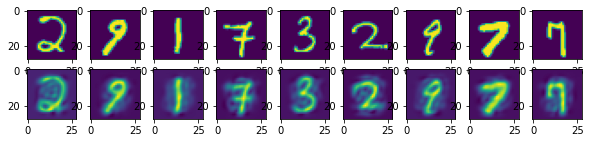

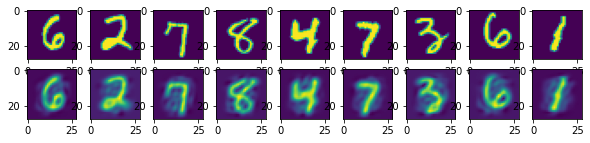

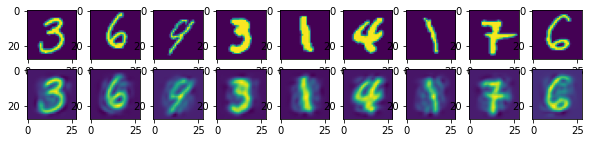

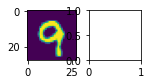

In [14]:
# print in easier to view format 

for k in range(0, len(labels)): # plot the with every dimension

    plt.figure(figsize=(10, 2))

    for i, item in enumerate(imgs): # enumerate - get counter per loop
        if i >= 9: break            # plot first 9 images
        plt.subplot(2, 9, i+1)
        item = imgs[k*9+i].reshape(-1, 28, 28)    
        plt.imshow(item[0])

    for i, item in enumerate(recons):  
        if i >= 9: break
        plt.subplot(2, 9, 9+i+1)    # row_length + i + 1
        item = recons[k*9+i].reshape(-1, 28, 28)
        plt.imshow(item[0])

### 4. PCA application to test dataset, varying number of principal components, saved to csv
This one that 'replicates' the other Neural Network outputs by testing on a separate dataset, and performance improvement with increasing principal components

In [34]:
# using trained data but apply the maths to new pics
dimensions = [3, 6, 8, 12, 32, 64, 128]
num_examples = 20

with open('M1.4_pca_dimensions.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    epoch = 1
    for i in dimensions:
        # change dimension here
        mat_reduced = PCA(x_df, i)

        eig_vecs = mat_reduced[1]
        eig_values = mat_reduced[2]

        for i in range(0,num_examples):
            image = y_df.iloc[i]

            imarray = image.to_numpy()
            score = np.dot(eig_vecs.T, image)
            target = label[i]
            z = (i, target, -10)
            row1 = numpy.append(z, imarray)
            writer.writerow(row1)

            #important to note: first value is the number label
            # second value -10 means it is original,
            # -20 means it is reconstructed

            mean_vector = np.mean(x_df, axis = 0)
            recon = reconstruct(image,eig_vecs,score,mean_vector)
            y = (i, target, -20)
            row2 = numpy.append(y, recon)
            writer.writerow(row2)
            
        
            pass
       
        pass

(280, 784)


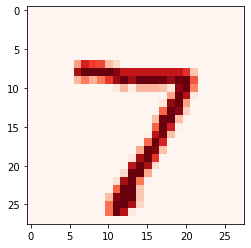

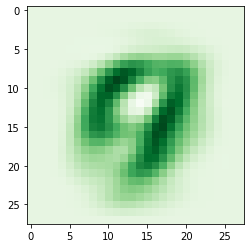

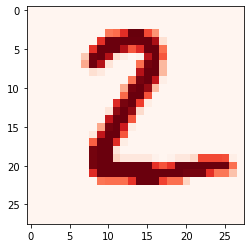

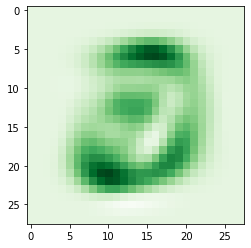

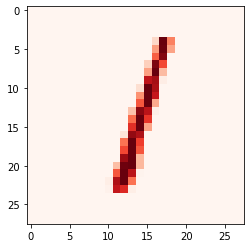

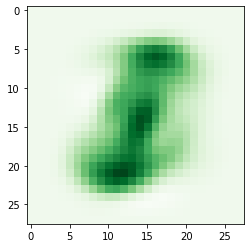

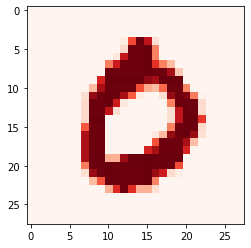

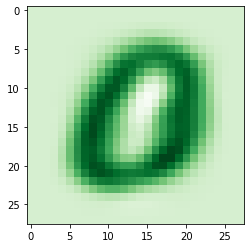

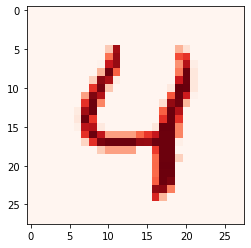

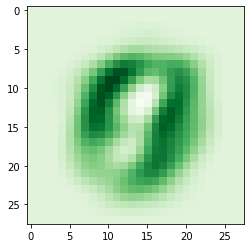

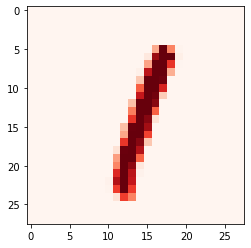

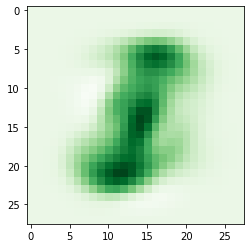

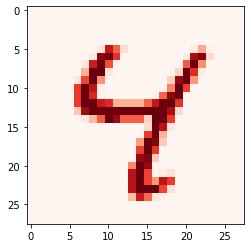

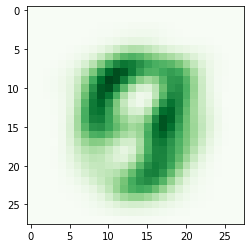

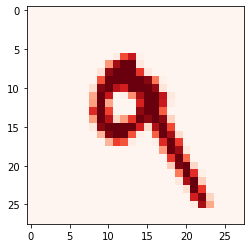

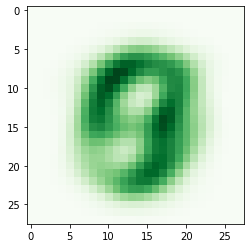

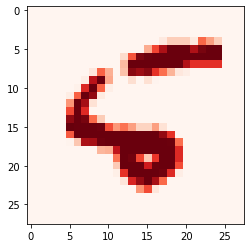

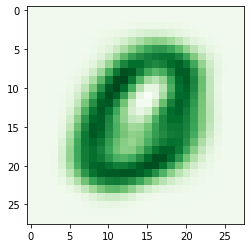

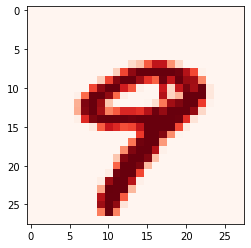

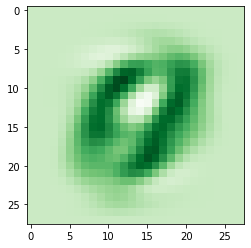

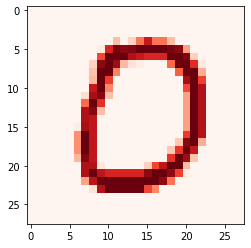

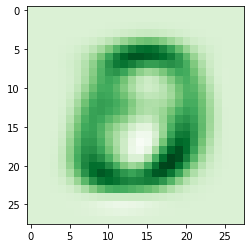

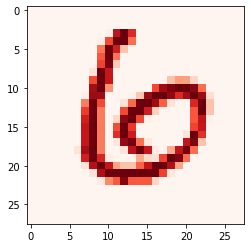

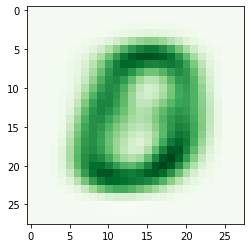

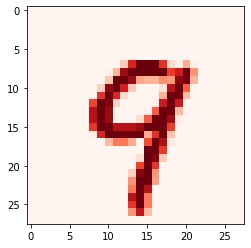

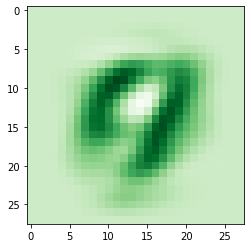

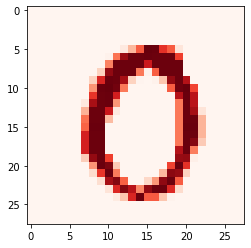

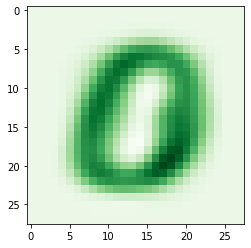

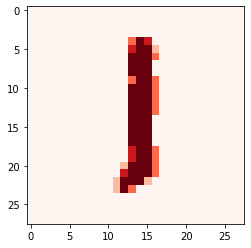

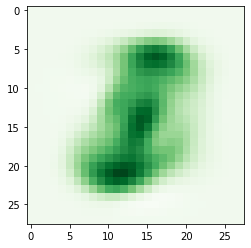

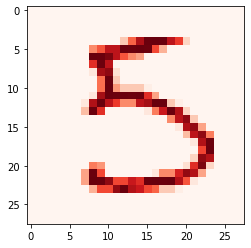

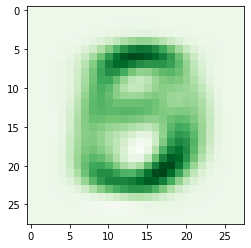

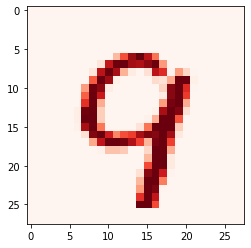

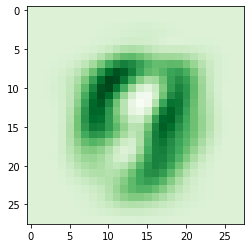

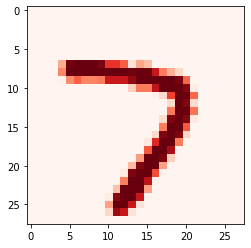

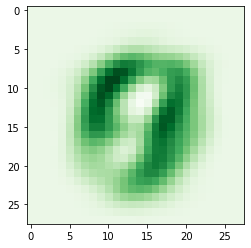

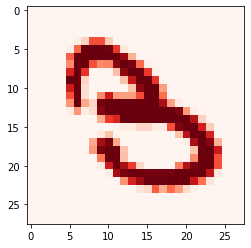

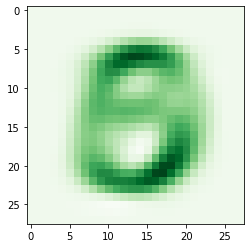

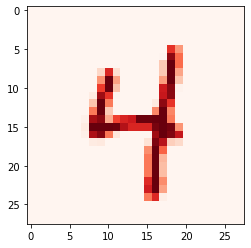

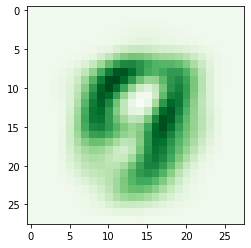

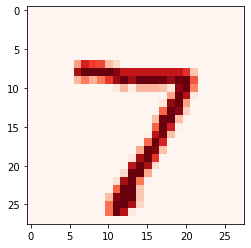

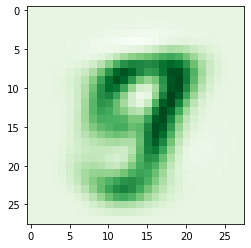

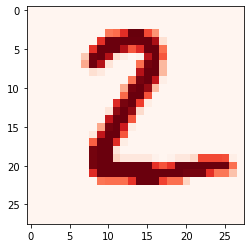

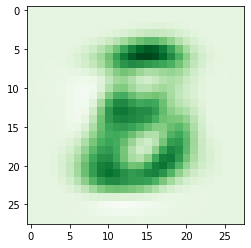

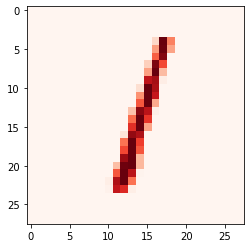

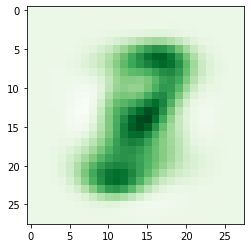

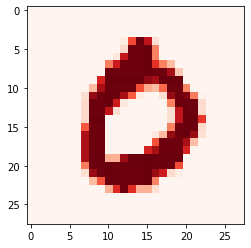

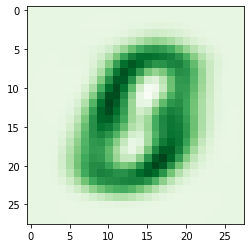

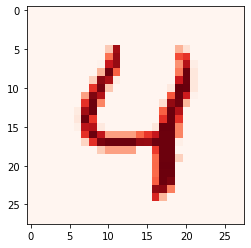

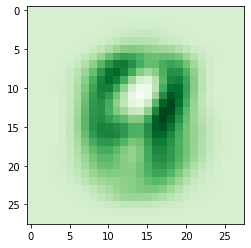

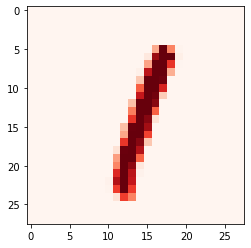

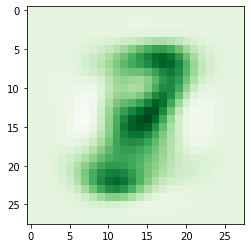

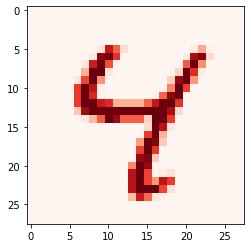

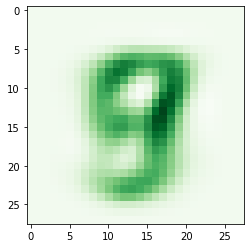

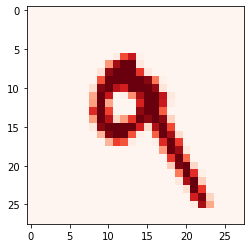

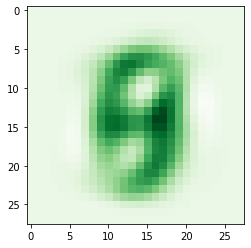

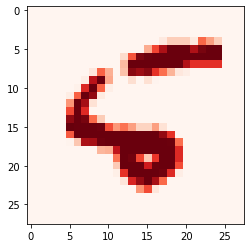

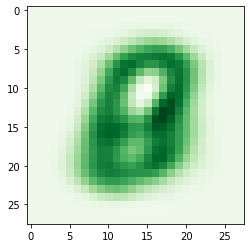

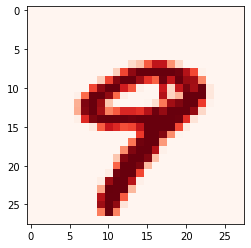

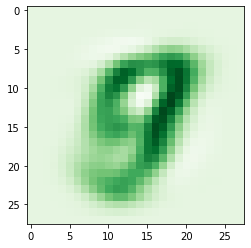

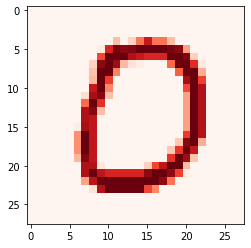

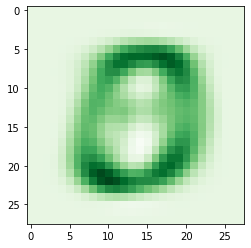

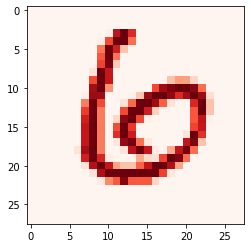

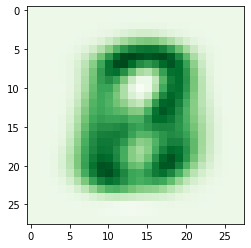

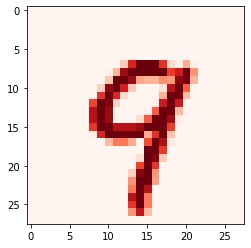

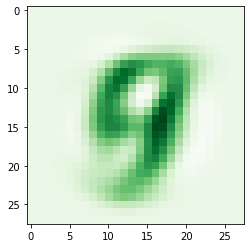

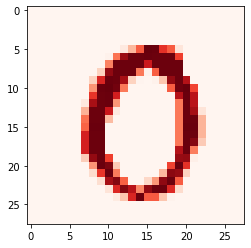

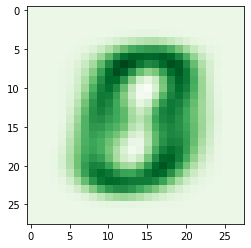

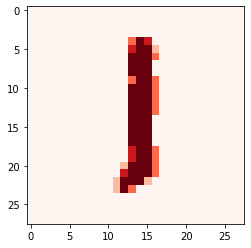

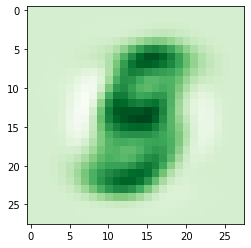

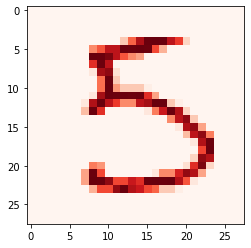

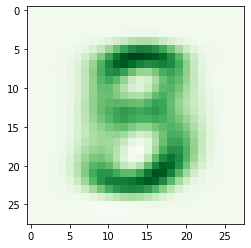

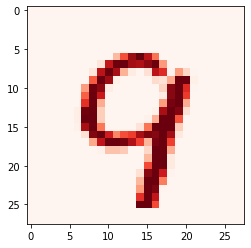

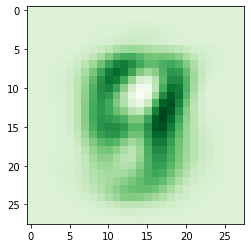

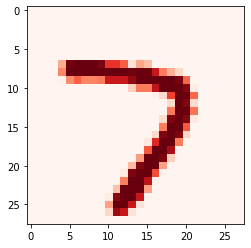

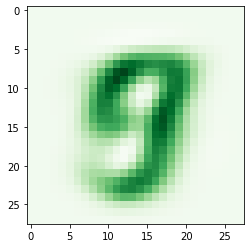

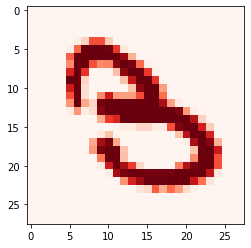

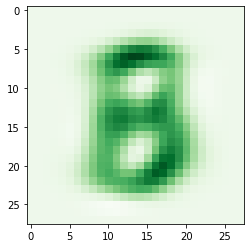

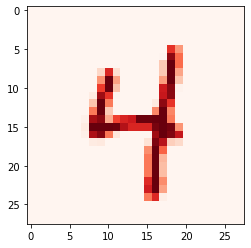

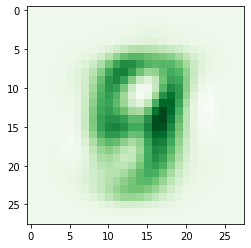

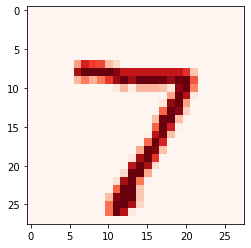

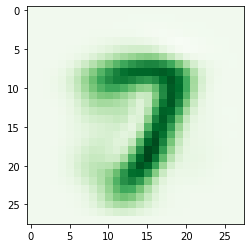

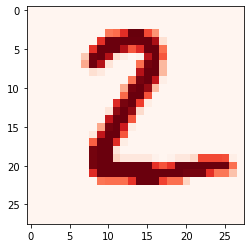

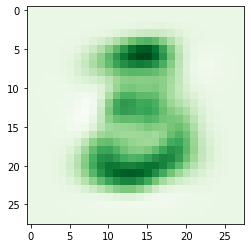

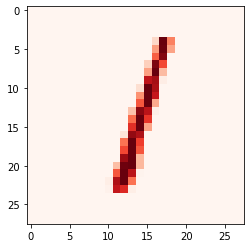

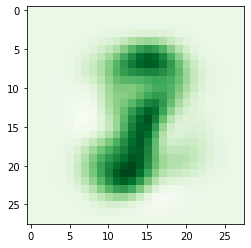

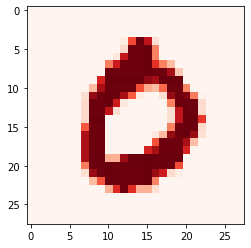

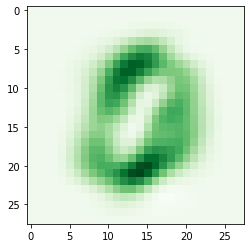

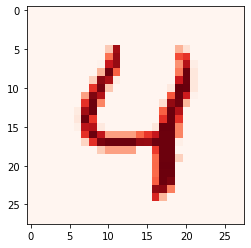

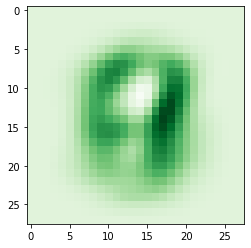

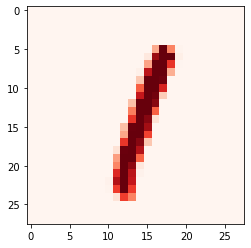

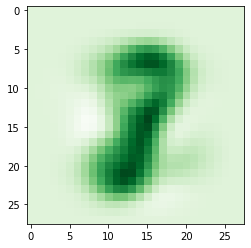

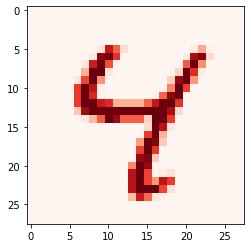

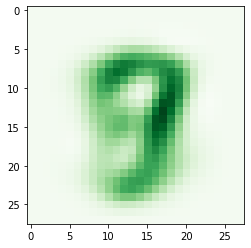

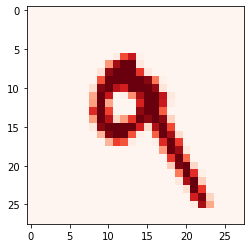

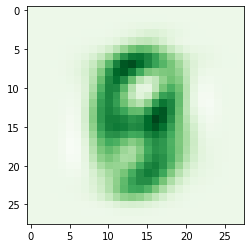

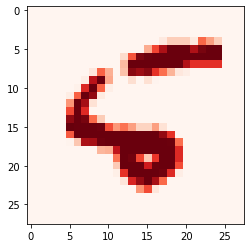

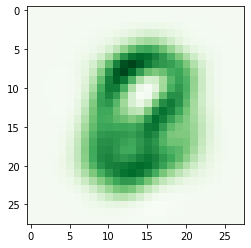

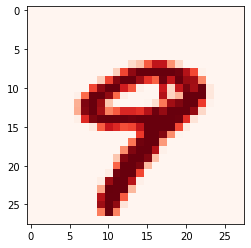

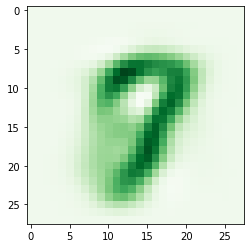

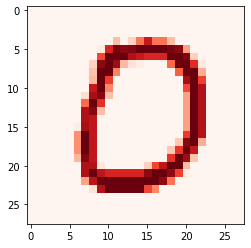

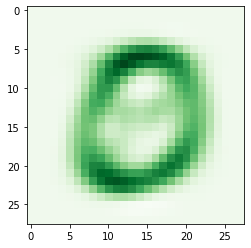

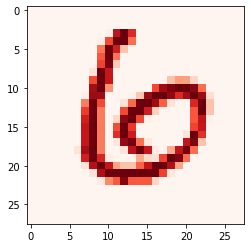

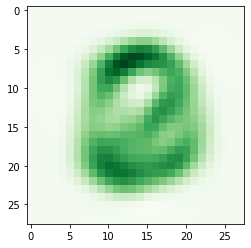

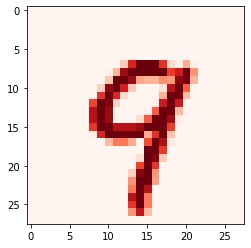

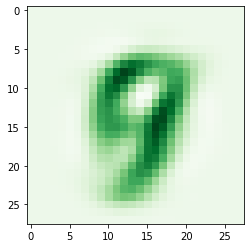

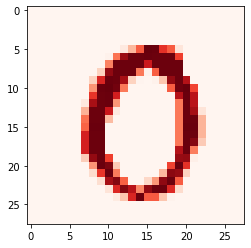

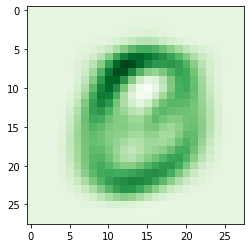

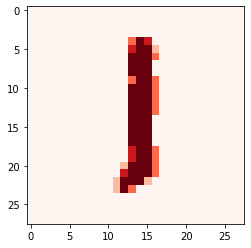

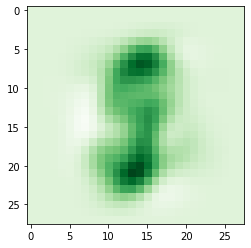

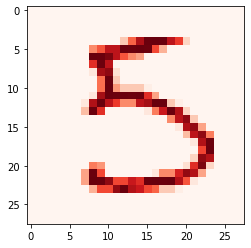

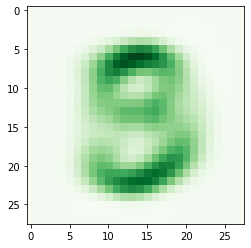

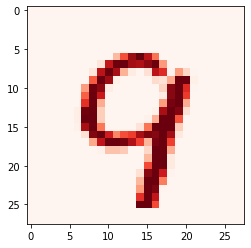

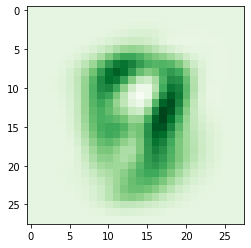

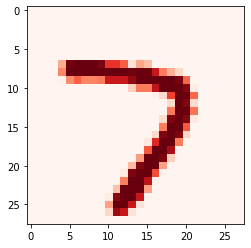

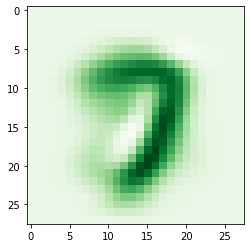

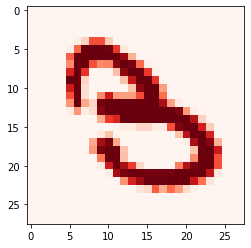

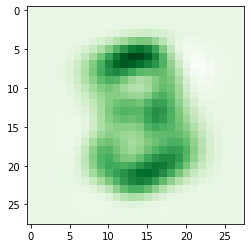

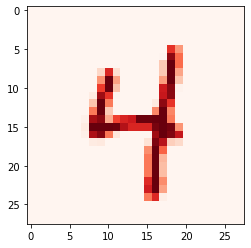

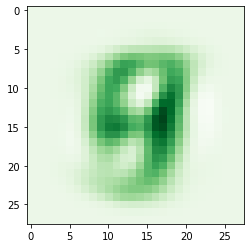

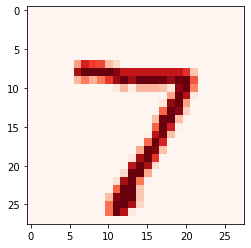

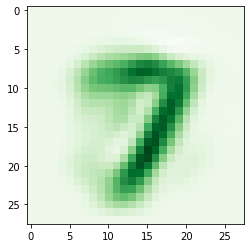

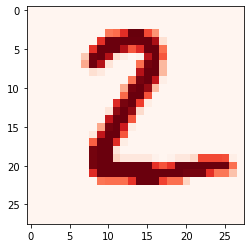

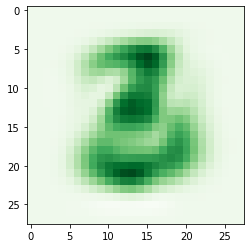

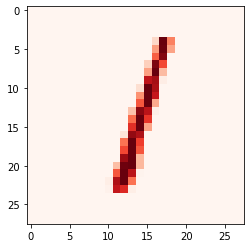

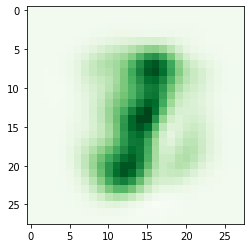

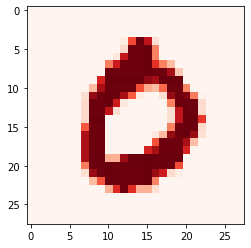

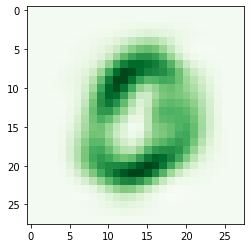

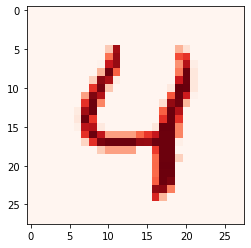

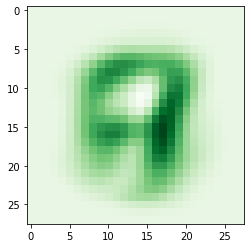

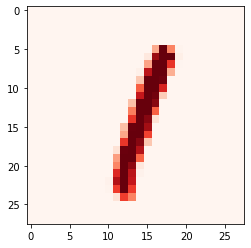

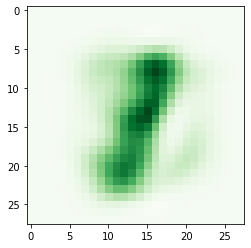

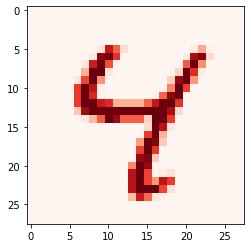

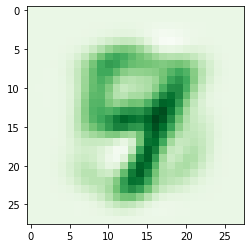

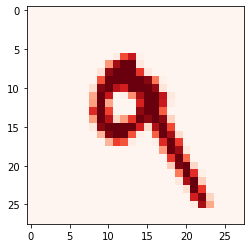

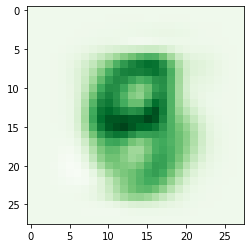

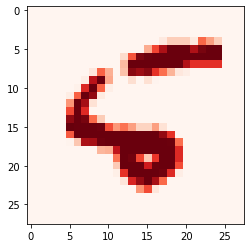

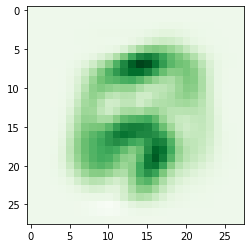

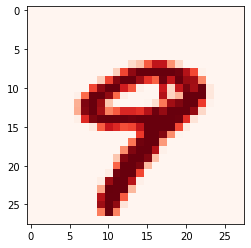

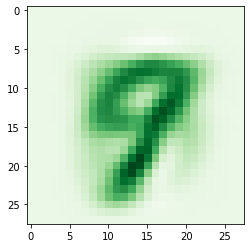

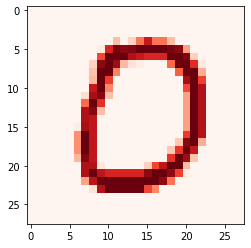

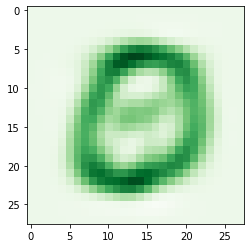

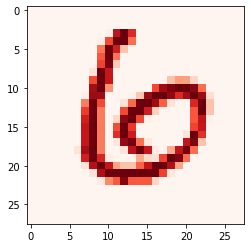

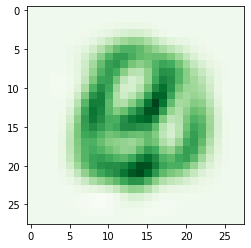

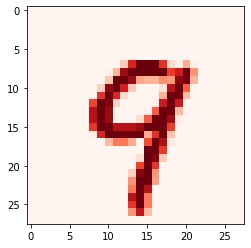

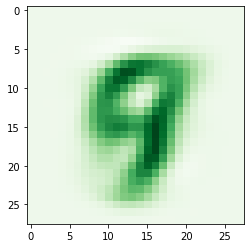

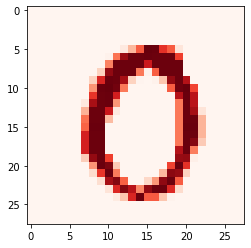

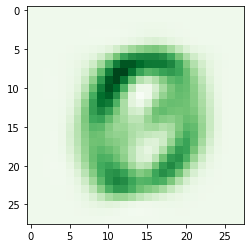

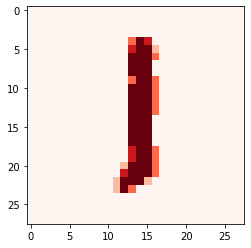

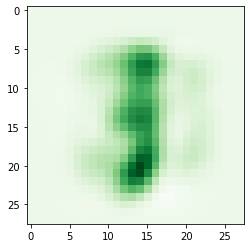

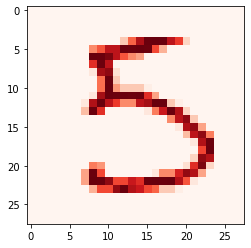

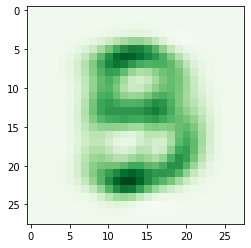

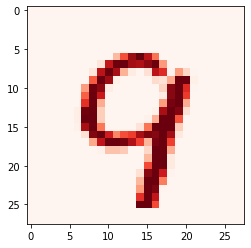

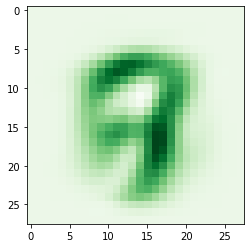

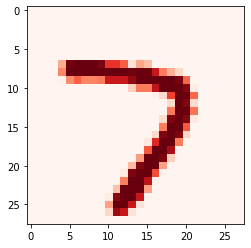

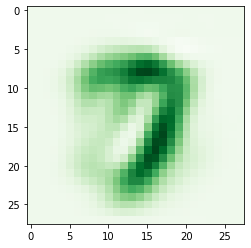

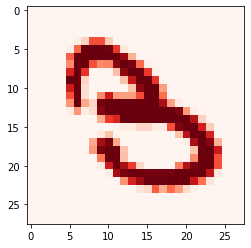

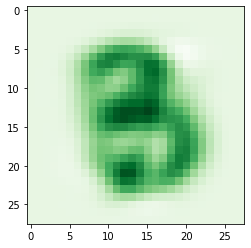

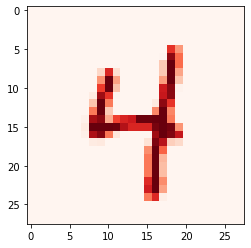

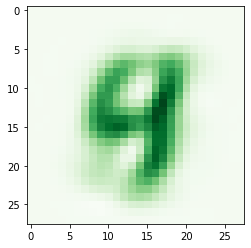

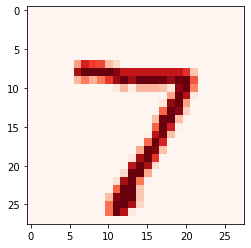

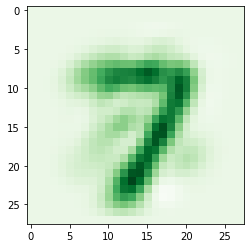

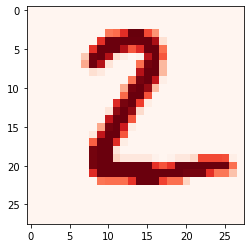

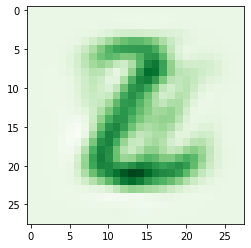

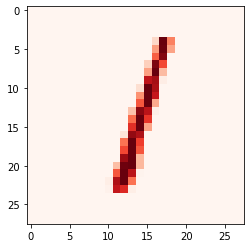

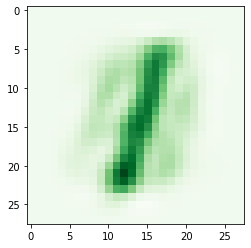

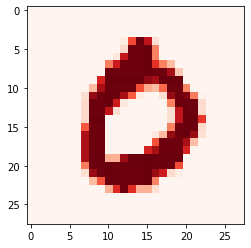

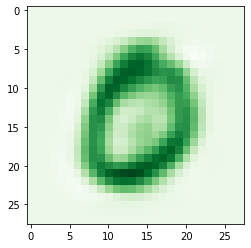

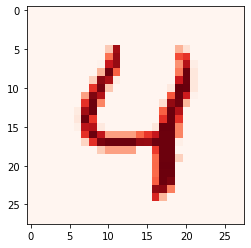

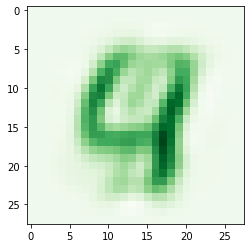

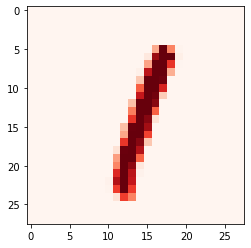

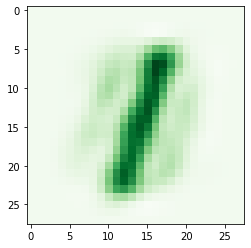

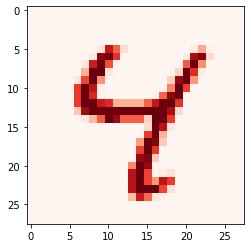

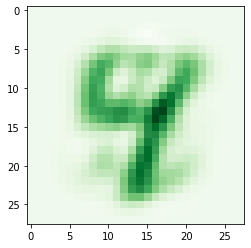

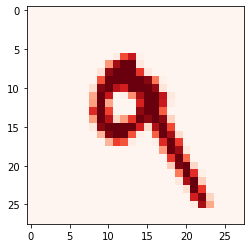

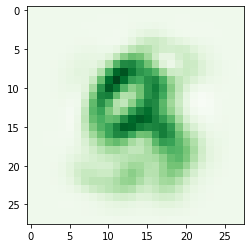

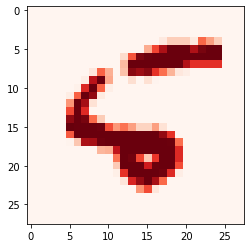

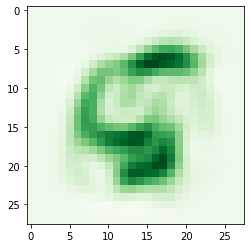

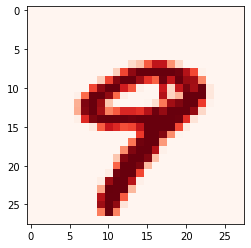

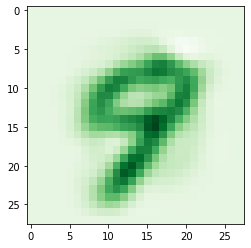

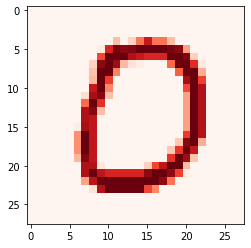

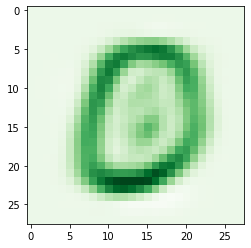

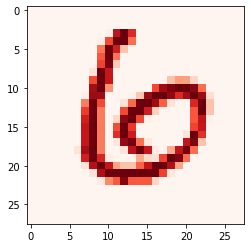

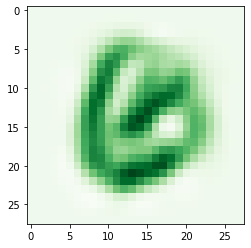

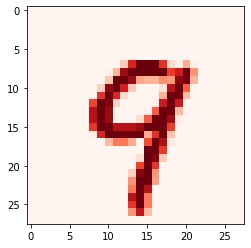

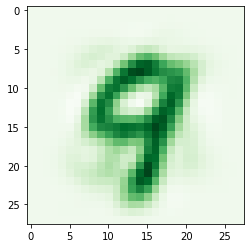

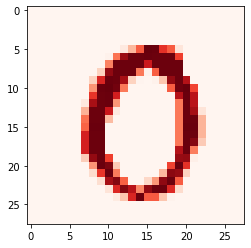

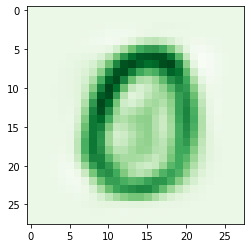

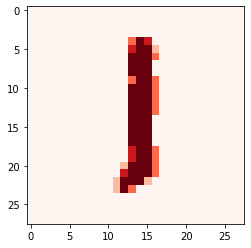

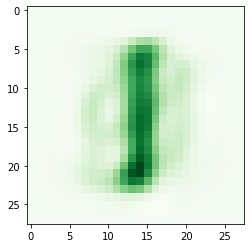

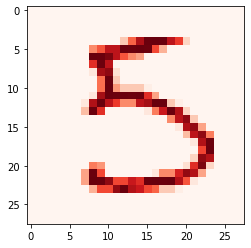

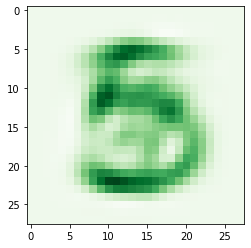

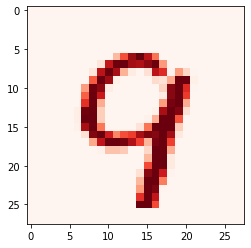

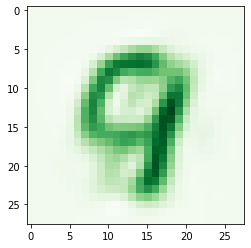

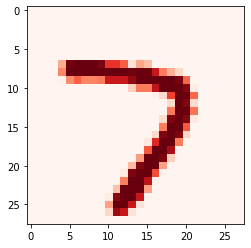

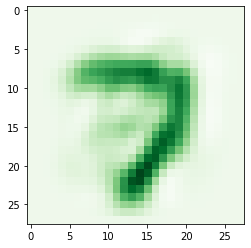

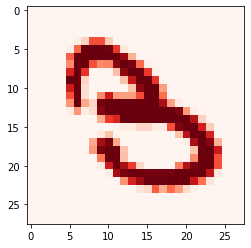

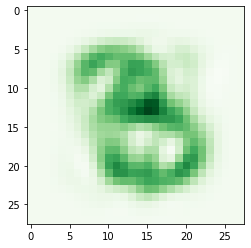

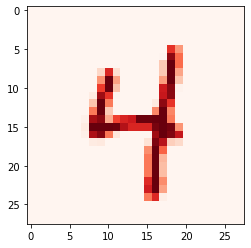

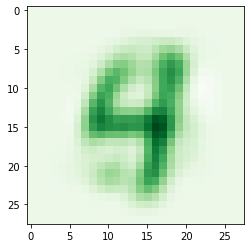

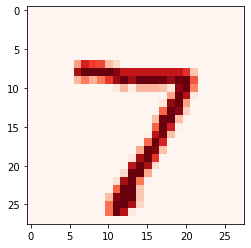

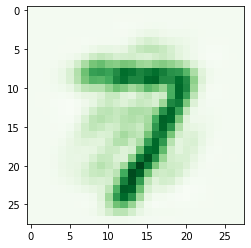

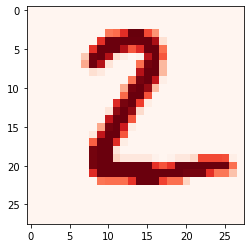

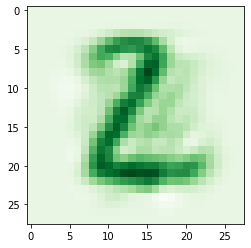

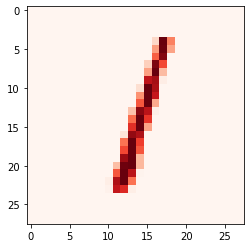

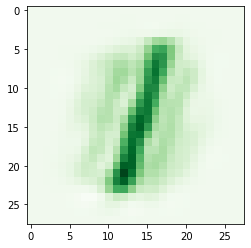

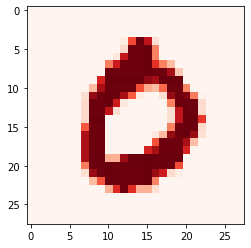

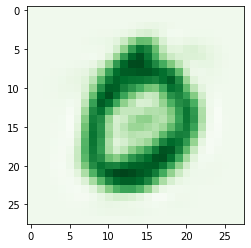

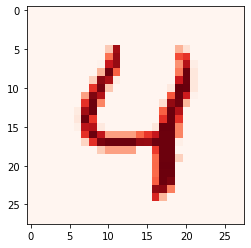

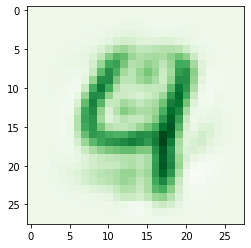

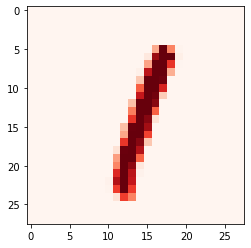

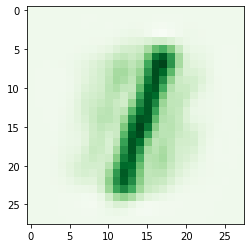

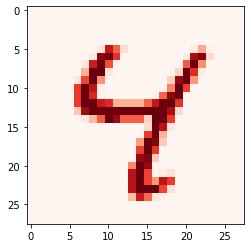

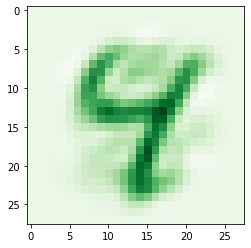

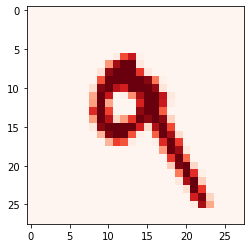

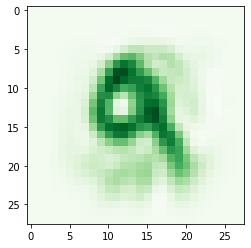

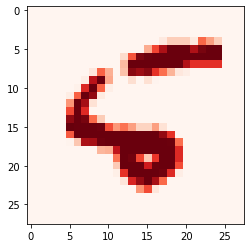

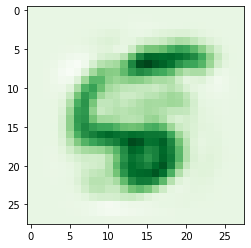

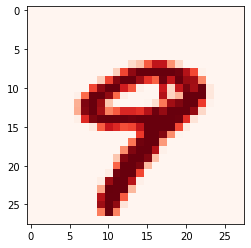

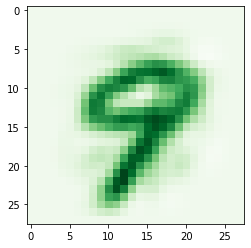

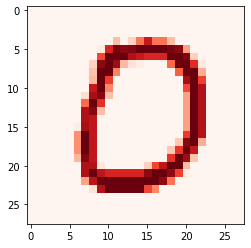

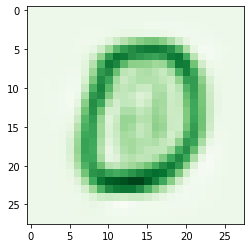

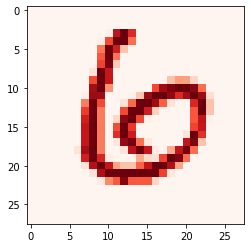

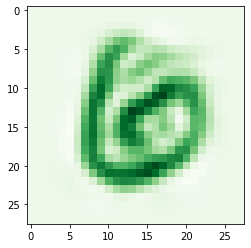

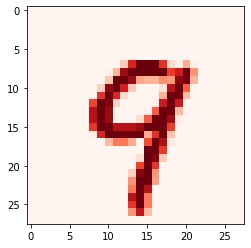

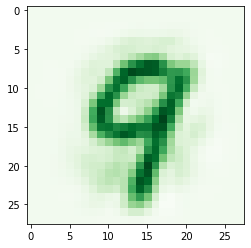

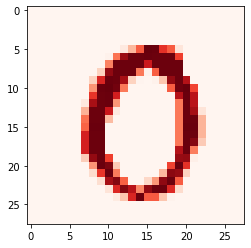

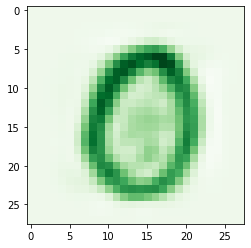

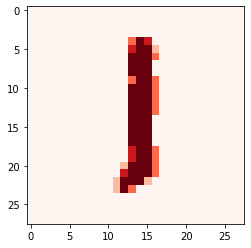

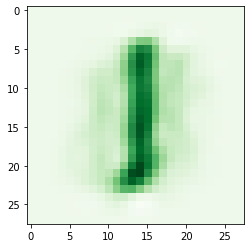

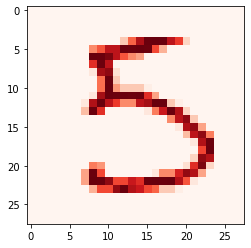

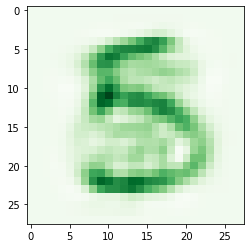

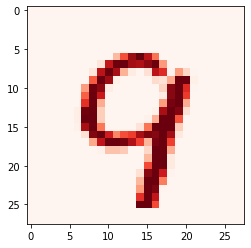

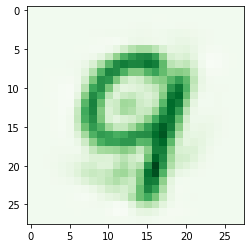

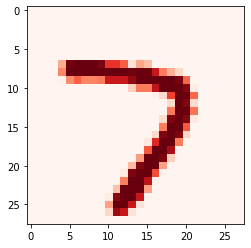

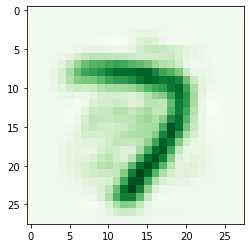

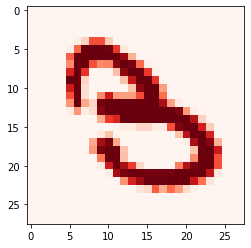

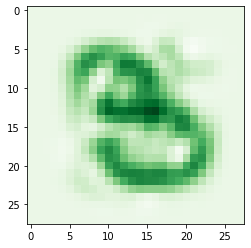

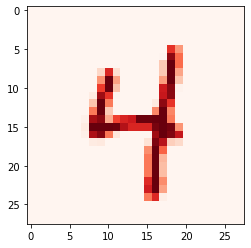

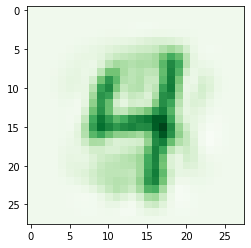

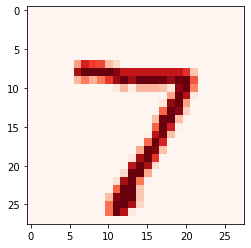

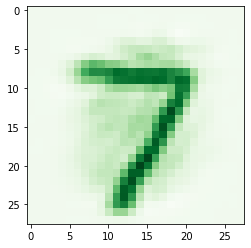

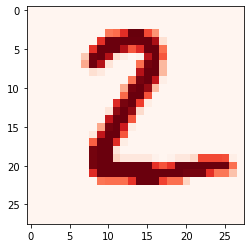

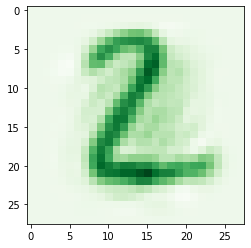

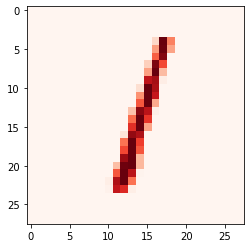

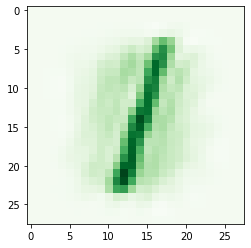

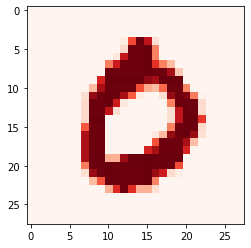

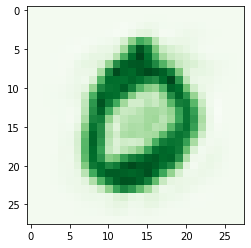

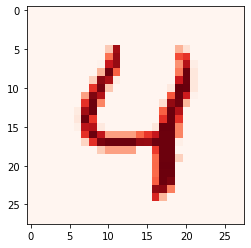

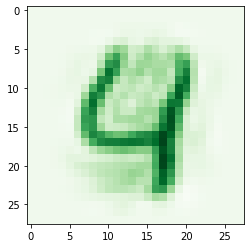

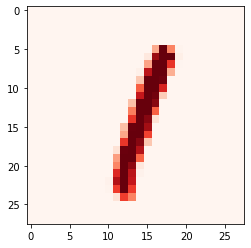

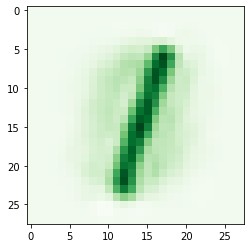

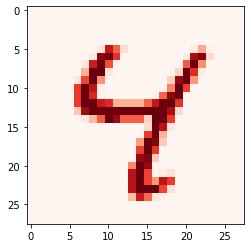

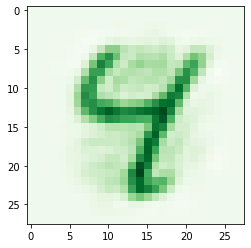

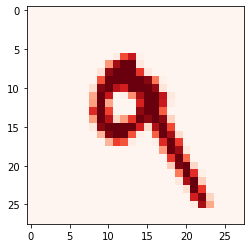

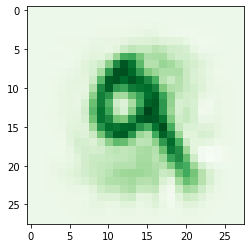

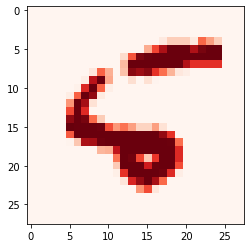

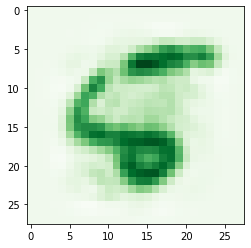

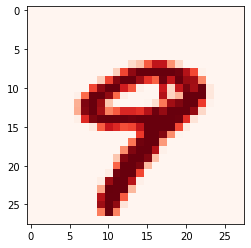

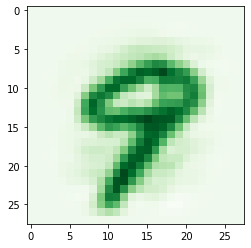

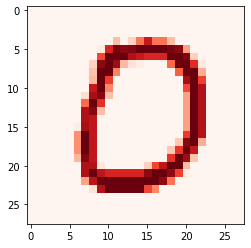

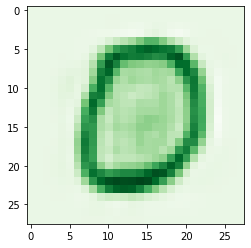

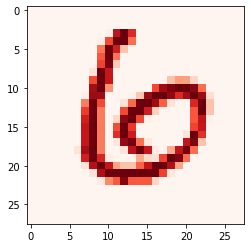

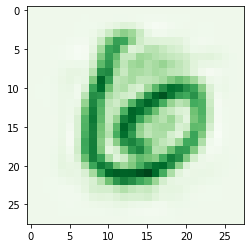

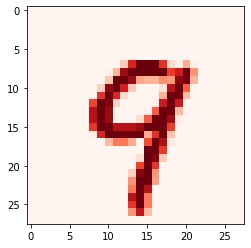

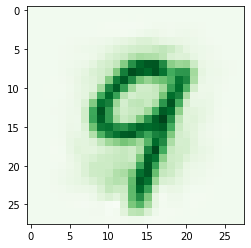

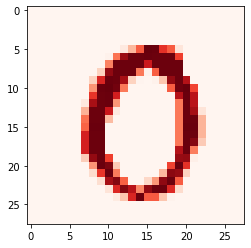

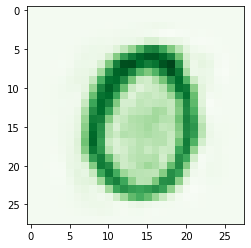

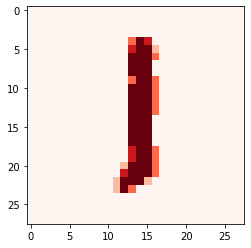

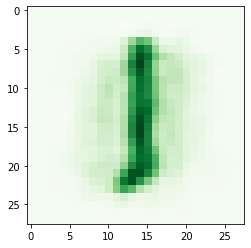

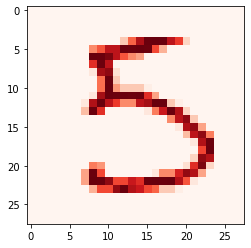

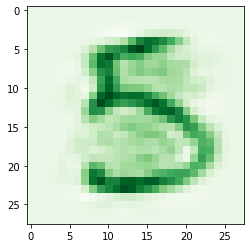

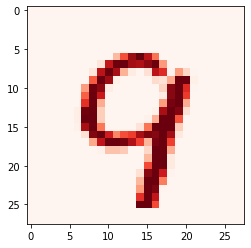

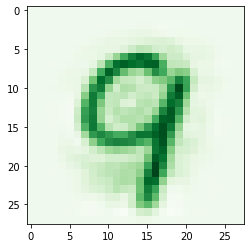

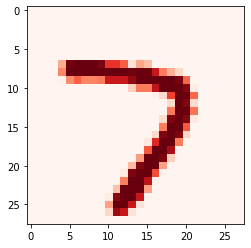

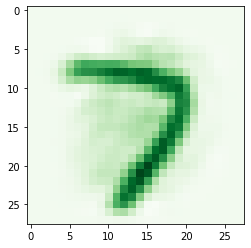

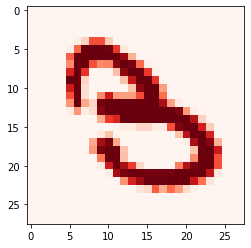

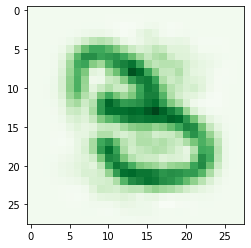

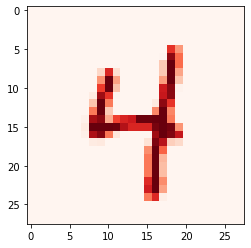

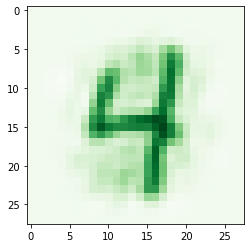

In [36]:
dimension = []
labels = []
orig_or_recon = []
values = []
with open('M1.4_pca_dimensions.csv', newline='') as f:
    csv_data = csv.reader(f)
    for row in csv_data:
        dimension.append(row[0])
        labels.append(row[1])
        orig_or_recon.append(row[2])
        values.append(row[3:])
        

dimension = numpy.asfarray(dimension)
labels = numpy.asfarray(labels)
orig_or_recon = numpy.asfarray(orig_or_recon)
values = numpy.asfarray(values)
print(numpy.shape(values))

imgs_test = []
recon_test = []

for i in range(0,len(labels)):
    if orig_or_recon[i] == -10:
        imgs_test.append(values[i])
        image = values[i].reshape([28,28])  # reshape it into square
        plt.imshow(image, cmap='Reds') 
        plt.show()
    else:
        recon_test.append(values[i])
        image = values[i].reshape([28,28])  # reshape it into square
        plt.imshow(image, cmap='Greens') 
        plt.show()



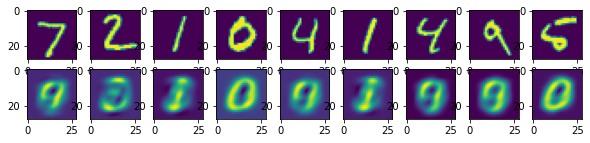

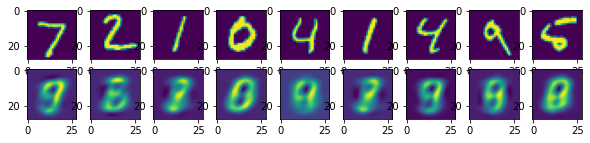

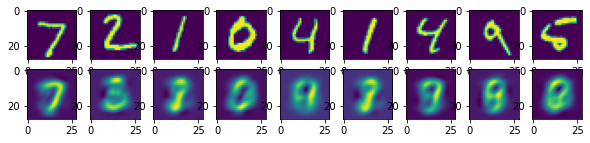

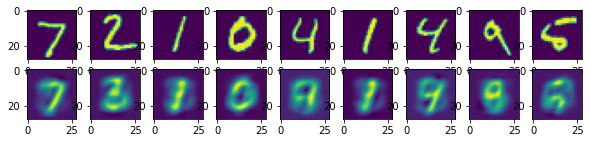

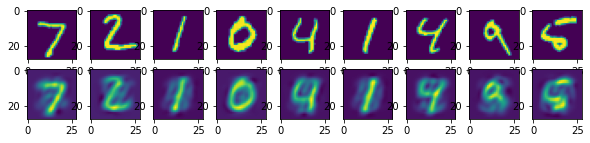

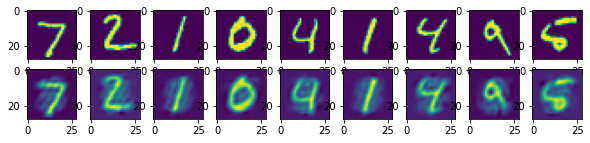

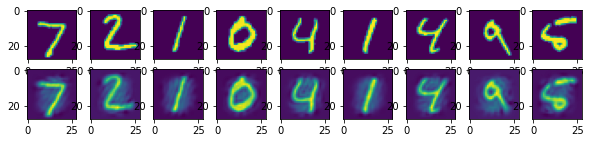

In [37]:
for k in range(0, len(dimensions)): # plot the with every dimension

    plt.figure(figsize=(10, 2))

    for i, item in enumerate(imgs): # enumerate - get counter per loop
        if i >= 9: break            # plot first 9 images
        plt.subplot(2, 9, i+1)
        item = imgs_test[k*num_examples+i].reshape(-1, 28, 28)    
        plt.imshow(item[0])

    for i, item in enumerate(recon):  
        if i >= 9: break
        plt.subplot(2, 9, 9+i+1)    # row_length + i + 1
        item = recon_test[k*num_examples+i].reshape(-1, 28, 28)
        plt.imshow(item[0])